<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction — Exploratory Data Analysis

## Background

The West Nile Virus (WNV) first appeared in the Americas in 1999, and has since become the **leading** mosquito-borne disease in the country ([source](https://www.nejm.org/doi/full/10.1056/NEJM200106143442401)). It is a virus transmitted to humans by mosquitoes that feed on infected birds. Around 20% of people who become infected with the virus develop symptoms ranging from fever, and headaches, to serious neurological illnesses that can result in death. The first WNV case was identified in Illinois in September 2001 when laboratory tests confirmed its presence in two crows found dead in the Chicago area. By the end of 2002, Illinois accounted for more human cases and deaths than any other state ([source](https://dph.illinois.gov/topics-services/diseases-and-conditions/west-nile-virus)). Since there is no vaccine or medication to prevent or treat WNV in people, the most effective way to prevent this virus is to reduce the number of mosquitoes and to take precautions to avoid mosquito bites ([source](https://www.cdc.gov/westnile/index.html#:~:text=There%20are%20no%20vaccines%20to,a%20fever%20and%20other%20symptoms.)). 

Following the outbreak of WNV in Chicago, the City of Chicago and Chicago Department of Public Health (CDPH) put in place a comprehensive surveillance and control program to trap and test mosquitos for WNV. This program is still in place today.

## Problem Statement

In light of the potential outbreak of West Nile Virus (WNV) in Chicago, the CDPH has asked its data scientist team to develop a predictive model based on past data on weather conditions and virus detection locations.

Given the use of public funds to finance the spraying of pesticide in order to  reduce the number of WNV cases, coupled with the potentially high cost of spraying pesticide over large areas, it is imperative for this project to bring focus to where and when pesticides should be sprayed that would effectively combat the WNV problem.

A model that accurately predicts the outbreak of the virus using information about the locations of mosquito traps and weather information ensures that the targeted spraying will be informed and well-justified.

## Methodology

The workflow of this project is as follows:
  1. Data cleaning:  
- `train.csv` - Duplicate records are removed from the dataset, with number of mosquitoes observed summed up by date observed, trap id, and species of mosquito observed.  
- `weather.csv` - Observations with trace amounts of precipitation are replaced with 0. Wetbulb is manually calculated for missing observations. Missing Heat and Cool values are filled in using previously observed values
Columns of data are converted to the correct data type
  2. Pre-processing:
- Weather data are joined to the train data based on date of observation
Numerical Data of this combined dataset is standard scaled
- Tavg, DewPoint, and PrecipTotal data are lagged by 7 days
- Train/test split is done
<br><br>
(**_The following sections continue in Notebook 2_**)


  3. Modelling:
- Hyperparameter tuning is done alongside Synthetic Minority Oversampling Technique (SMOTE)  
- The models ran are:
      - Logistic Regression (with and without hyperparameter tuning)
      - Random Forest
      - AdaBoost
      - Gradient Boost
      - XGBoost
      - Support Vector Machine
      - K-Nearest Neighbours
- Feature Importance Analysis
- Prediction on Test Dataset
- ROC AUC Score Comparison
  4. Cost Benefit Analysis:
- Cost
- Benefit
- Analysis
  5. Recommendations
  6. Limitations
  7. Future Plans
  8. Conclusions




Our definition of a good model is one that is able to accurately predict the presence of the virus, i.e. minimum false negatives and false positives. The ROC-AUC score will be our primary evaluation metric.

**Datasets:**
 - `spray.csv`: Spray dataset
 - `test.csv`: Test dataset
 - `train.csv`: Train dataset
 - `weather.csv`: Weather dataset
<br>

**Brief Description of Datasets selected:** 
- Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of [*West Nile virus*](http://www.cdc.gov/westnile/) before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort. 

**Main Dataset**
- These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 
- The location of the traps are described by the block number and street name. For your convenience, we have mapped these attributes into Longitude and Latitude in the dataset. Please note that these are derived locations. For example, Block=79, and Street= "W FOSTER AVE" gives us an approximate address of "7900 W FOSTER AVE, Chicago, IL", which translates to [*(41.974089,-87.824812) on the map*](https://www.google.com/maps/place/41%C2%B058'26.7%22N+87%C2%B049'29.3%22W/@41.9749544,-87.8071845,12z/).
- Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. 
- Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitos is found at a certain trap at a certain time. In the test set, we ask you for all combinations/permutations of possible predictions and are only scoring the observed ones.

**Spray Data**
- The City of Chicago also does spraying to kill mosquitos. You are given the GIS data for their spray efforts in 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4366/media/all_loc_trap.png" style="float: centre; margin: 20px; height: 570px; width: 650px">

**Weather Data**
- It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. We provide you with the dataset from [*NOAA*](http://cdo.ncdc.noaa.gov/qclcd/QCLCD?prior=N) of the weather conditions of 2007 to 2014, during the months of the tests. 
  - Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
  - Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

**Map Data**
- The map files **mapdata_copyright_openstreetmap_contributors.rds** and **mapdata_copyright_openstreetmap_contributors.txt** are from Open Streetmap and are primarily provided for use in visualizations (but you are allowed to use them in your models if you wish).
- Here's [*an example*](https://www.kaggle.com/code/jbobtaylor/show-map-image-in-python/script) using **mapdata_copyright_openstreetmap_contributors.txt**.

**File Descriptions**
- **train.csv**, **test.csv** - the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.
 - Id: the id of the record
 - Date: date that the WNV test is performed
 - Address: approximate address of the location of trap. This is used to send to the GeoCoder.
 - Species: the species of mosquitos
 - Block: block number of address
 - Street: street name
 - Trap: Id of the trap
 - AddressNumberAndStreet: approximate address returned from GeoCoder
 - Latitude, Longitude: Latitude and Longitude returned from GeoCoder
 - AddressAccuracy: accuracy returned from GeoCoder
 - NumMosquitos: number of mosquitoes caught in this trap
 - WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present.
- **spray.csv** - GIS data of spraying efforts in 2011 and 2013
 - Date, Time: the date and time of the spray
 - Latitude, Longitude: the Latitude and Longitude of the spray
- **weather.csv** - weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf.

## Data Cleaning & Preprocessing 

In this stage after importing relevant libraries and dataset, we will be cleaning the 4 datasets that we have based on these few pointers:
1. Change the Date format to pandas time index
2. Check and treat null value accordingly
3. Check and remove duplicates
4. Remove irrelevant columns and create relevant new columns

### Import Libraries and Datasets

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
sns.set()
sns.set_theme(style = 'whitegrid') # set theme to be whitegrid

import datetime
from datetime import datetime

In [2]:
# Import the 4 datasets
df_spray = pd.read_csv('./data/spray.csv')        # Import spray dataset
df_test = pd.read_csv('./data/test.csv')          # Import test dataset
df_train = pd.read_csv('./data/train.csv')        # Import train dataset
df_weather = pd.read_csv('./data/weather.csv', na_values = [' ', '-', 'M'])    # Import weather dataset

df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


### Cleaning `train.csv` Dataset

For `train.csv` dataset, first we will convert the Date to datetime index and check for missing value. Then, we check if any duplicates based on `Date`, `Species` and `Trap` columns

In [3]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [5]:
df_train['Date'].head()

0   2007-05-29
1   2007-05-29
2   2007-05-29
3   2007-05-29
4   2007-05-29
Name: Date, dtype: datetime64[ns]

In [6]:
df_train.shape

(10506, 12)

In [7]:
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

Find the duplicate rows based on `Date`, `Species` and `Trap` columns

In [8]:
df_train[df_train.duplicated(subset = ['Date','Species','Trap'], keep = False)].head(10)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
294,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,35,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
296,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,8,0
297,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
298,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,8,0


In [9]:
df_train[df_train.duplicated(subset = ['Date','Species','Trap'], keep = False)].shape

(2786, 12)

There are 2786 rows that have duplicates, we will sum up the `NumMosquitos` column and create new column of `TotMosquitos`

In [10]:
df_train['TotMosquitos'] = df_train.groupby(['Date', 'Trap', 'Species'])['NumMosquitos'].transform('sum')

In [11]:
df_train['TotMosquitos']

0        1
1        1
2        1
3        1
4        4
        ..
10501    6
10502    5
10503    1
10504    5
10505    1
Name: TotMosquitos, Length: 10506, dtype: int64

Drop the row that has duplicates

In [12]:
df_train = df_train.drop_duplicates(subset = ['Date', 'Species', 'Trap'])

In [13]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,TotMosquitos
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,4


In [14]:
df_train.shape

(8475, 13)

After dropping the rows, we have 8,475 rows remaining.

### Cleaning `weather.csv` Dataset

For `weather.csv` dataset, we treated the columns below that have null value:
- Tavg
- WetBulb
- Heat
- Cool
- PrecipTotal
- StnPressure
- SeaLevel
- AvgSpeed
- CodeSum (which may contain more than one parameter in the column and will be split to multiple columns based on the parameter)

Thereafter, we dropped the irrelevant columns as follows:
- Depart
- Sunrise
- Sunset
- Depth
- SnowFall
- Water1

In [15]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,NaN,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,NaN,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [16]:
df_weather.shape

(2944, 22)

In [17]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [18]:
df_weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum        1609
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

We can remove the following columns:
- Depart, Sunrise and Sunset, since Station 2 does not record it
- Depth & SnowFall, station 2 does not record it and most are 0
- Water1, most row are empty

For PrecipTotal with value '  T', we can convert to 0.00, as it is considered very small amount to be recorded

In [19]:
df_weather.replace(['  T'], [0.00], inplace = True)

##### - Tavg

In [20]:
df_weather[df_weather['Tavg'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,NaN,NaN,42,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,NaN,NaN,68,71.0,NaN,NaN,...,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,NaN,NaN,41,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,NaN,NaN,70,74.0,NaN,NaN,...,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,NaN,NaN,51,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,NaN,NaN,39,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,NaN,NaN,48,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,NaN,NaN,48,54.0,NaN,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,NaN,NaN,44,50.0,NaN,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,NaN,NaN,43,47.0,NaN,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [21]:
def CalcTavg(Tavg, Tmax, Tmin):
    if pd.isna(Tavg) == True:
        return (Tmax + Tmin) / 2
    else: return Tavg

In [22]:
df_weather['Tavg'] = df_weather.apply(lambda df: CalcTavg(df['Tavg'], df['Tmax'], df['Tmin']), axis = 1)

In [23]:
df_weather['Tavg'].isnull().sum()

0

##### - WetBulb

In [24]:
df_weather[df_weather['WetBulb'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78.0,7.0,60,NaN,0.0,13.0,...,NaN,0.0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73.0,0.0,57,NaN,0.0,8.0,...,NaN,0.0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71.0,-2.0,61,NaN,0.0,6.0,...,RA,0.0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77.0,NaN,63,NaN,0.0,12.0,...,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7


A quick technique that many forecasters use to determine the wet-bulb temperature is called the "1/3 rule" ([*source*](https://www.weather.gov/source/zhu/ZHU_Training_Page/convective_parameters/skewt/skewtinfo.html)). The technique is to first find the dewpoint depression (temperature minus dewpoint). Then take this number and divide by 3. Subtract this number from the temperature. We now have an approximation for the wet-bulb temperature.

In [25]:
def CalcWetBulb(Tavg, Dew, WBulb):
    if pd.isna(WBulb) == True:
        return Tavg - ((Tavg - Dew) // 3)
    else: return WBulb

In [26]:
df_weather['WetBulb'] = df_weather.apply(lambda df: CalcWetBulb(df['Tavg'], df['DewPoint'], df['WetBulb']), axis = 1)

In [27]:
df_weather['WetBulb'].isnull().sum()

0

##### - Heat and Cool

In [28]:
df_weather[df_weather['Heat'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,64.5,NaN,42,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,NaN,68,71.0,NaN,NaN,...,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,NaN,41,47.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,NaN,70,74.0,NaN,NaN,...,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,NaN,51,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,NaN,39,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,NaN,48,54.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,NaN,48,54.0,NaN,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,NaN,44,50.0,NaN,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,NaN,43,47.0,NaN,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


We will use the same Heat and Cool temperature from the other station.

In [29]:
df_weather[['Heat','Cool']] = df_weather[['Heat','Cool']].fillna(method = 'ffill')

In [30]:
df_weather[['Heat','Cool']].isnull().sum()

Heat    0
Cool    0
dtype: int64

##### - PrecipTotal

In [31]:
df_weather[df_weather['PrecipTotal'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,73,61,67.0,NaN,56,61.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,29.43,30.07,12.2,2,13.3
119,2,2007-06-29,71,56,64.0,NaN,56,60.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,29.47,30.11,7.4,2,8.2


In [32]:
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].fillna(method = 'ffill')

In [33]:
df_weather['PrecipTotal'].isnull().sum()

0

In [34]:
# Convert preciptotal datatype to float
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].astype(float)

##### - StnPressure

In [35]:
df_weather[df_weather['StnPressure'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,NaN,53,62.0,0.0,12.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,5,NaN
848,1,2009-06-26,86,69,78.0,7.0,60,72.0,0.0,13.0,...,NaN,0.0,NaN,0.0,0.0,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73.0,0.0,57,68.0,0.0,8.0,...,NaN,0.0,NaN,0.0,0.0,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75.0,NaN,55,63.0,0.0,10.0,...,NaN,NaN,NaN,NaN,0.0,NaN,30.07,6.0,6,7.4


In [36]:
df_weather['StnPressure'] = df_weather['StnPressure'].fillna(method = 'ffill')

In [37]:
df_weather['StnPressure'].isnull().sum()

0

##### - SeaLevel

In [38]:
df_weather[df_weather['SeaLevel'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,NaN,53,62.0,0.0,12.0,...,NaN,NaN,NaN,NaN,0.00,29.36,NaN,7.0,5,NaN
832,1,2009-06-18,80,61,71.0,1.0,63,67.0,0.0,6.0,...,RA BR,0.0,NaN,0.0,0.12,29.08,NaN,6.7,16,7.9
994,1,2009-09-07,77,59,68.0,1.0,59,62.0,0.0,3.0,...,BR,0.0,NaN,0.0,0.00,29.39,NaN,5.8,3,4.0
1732,1,2011-09-08,75,57,66.0,0.0,53,59.0,0.0,1.0,...,RA,0.0,NaN,0.0,0.00,29.34,NaN,13.0,2,13.4
1745,2,2011-09-14,60,48,54.0,NaN,45,51.0,11.0,0.0,...,RA BR HZ FU,NaN,NaN,NaN,0.00,29.47,NaN,6.0,32,NaN
1756,1,2011-09-20,74,49,62.0,0.0,54,58.0,3.0,0.0,...,MIFG BCFG BR,0.0,NaN,0.0,0.00,29.26,NaN,7.3,18,7.3
2067,2,2012-08-22,84,72,78.0,NaN,51,61.0,0.0,5.0,...,NaN,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2090,1,2012-09-03,88,71,80.0,12.0,70,73.0,0.0,15.0,...,BR,0.0,NaN,0.0,0.00,29.17,NaN,4.6,6,4.4
2743,2,2014-07-23,76,64,70.0,NaN,56,61.0,0.0,5.0,...,NaN,NaN,NaN,NaN,0.00,29.47,NaN,16.4,2,16.7


In [39]:
df_weather['SeaLevel'] = df_weather['SeaLevel'].fillna(method = 'ffill')

In [40]:
df_weather['SeaLevel'].isnull().sum()

0

##### - AvgSpeed

In [41]:
df_weather[df_weather['AvgSpeed'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,NaN,53,62.0,0.0,12.0,...,NaN,NaN,NaN,NaN,0.0,29.36,30.09,7.0,5,NaN
1745,2,2011-09-14,60,48,54.0,NaN,45,51.0,11.0,0.0,...,RA BR HZ FU,NaN,NaN,NaN,0.0,29.47,30.09,6.0,32,NaN
2067,2,2012-08-22,84,72,78.0,NaN,51,61.0,0.0,5.0,...,NaN,NaN,NaN,NaN,0.0,29.39,30.07,4.7,19,NaN


In [42]:
df_weather['AvgSpeed'] = df_weather['AvgSpeed'].fillna(method = 'ffill')

In [43]:
df_weather['AvgSpeed'].isnull().sum()

0

##### - CodeSum

In [44]:
# Check the values for CodeSum
df_weather.CodeSum.unique()

array([nan, 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [45]:
# Replace nan with 'NA'
df_weather.CodeSum.replace(np.nan, 'NA', inplace = True)

In [46]:
df_weather.CodeSum.unique()

array(['NA', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG

In [47]:
# Create a function to cleanup codesum column
def convert_codesum(df):
    codesum_list = []
    for code in df['CodeSum'].unique():
        codesum_list.extend(code.split(' '))
    codesum_list = list(set(codesum_list))
    print(f'unique codesum {codesum_list}')
    for code in codesum_list:
        df[f'Cs{code}'] = df['CodeSum'].map(lambda x : 1 if code in x else 0)
    return

In [48]:
# Cleanup codesum column
convert_codesum(df_weather)

unique codesum ['GR', 'HZ', 'VCFG', 'TSRA', 'DZ', 'BR', 'MIFG', 'NA', 'RA', 'BCFG', 'TS', 'FG', 'FG+', 'SQ', 'FU', 'SN', 'VCTS']


In [106]:
df_weather.to_csv('./data/df_weather1.csv', index = False)

In [107]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   Depart       1472 non-null   float64       
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   float64       
 8   Heat         2944 non-null   float64       
 9   Cool         2944 non-null   float64       
 10  Sunrise      1472 non-null   float64       
 11  Sunset       1472 non-null   float64       
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   float64       
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

In [108]:
df_weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'CsGR', 'CsHZ', 'CsVCFG',
       'CsTSRA', 'CsDZ', 'CsBR', 'CsMIFG', 'CsNA', 'CsRA', 'CsBCFG', 'CsTS',
       'CsFG', 'CsFG+', 'CsSQ', 'CsFU', 'CsSN', 'CsVCTS'],
      dtype='object')

In [109]:
# Create a function to drop columns
def drop_columns(df, columns_to_drop):
    df.drop(columns = columns_to_drop, inplace = True)

In [110]:
# List the columns to drop
columns_to_drop = ['Depart', 'CodeSum', 'Depth', 'Water1', 'SnowFall']
drop_columns(df_weather, columns_to_drop)
df_weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CsNA,CsRA,CsBCFG,CsTS,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,448.0,...,1,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,NaN,...,1,0,0,0,0,0,0,0,0,0


In [111]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   float64       
 7   Heat         2944 non-null   float64       
 8   Cool         2944 non-null   float64       
 9   Sunrise      1472 non-null   float64       
 10  Sunset       1472 non-null   float64       
 11  PrecipTotal  2944 non-null   float64       
 12  StnPressure  2944 non-null   float64       
 13  SeaLevel     2944 non-null   float64       
 14  ResultSpeed  2944 non-null   float64       
 15  ResultDir    2944 non-null   int64         
 16  AvgSpe

### Cleaning `test.csv` Dataset

In [112]:
df_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [114]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [115]:
df_test['Date'].head()

0   2008-06-11
1   2008-06-11
2   2008-06-11
3   2008-06-11
4   2008-06-11
Name: Date, dtype: datetime64[ns]

In [116]:
# Check the unique dates in test dataset
df_test['Date'].value_counts()

2012-07-09    1293
2012-08-03    1282
2012-07-27    1282
2012-07-19    1260
2010-07-13    1257
              ... 
2010-09-16    1208
2008-06-17    1208
2010-07-01    1208
2008-07-21    1208
2014-10-02    1208
Name: Date, Length: 95, dtype: int64

In [117]:
# Check date range of test dataset
print("Earliest Record: ", df_test['Date'].min())
print("Latest Record: ", df_test['Date'].max())

Earliest Record:  2008-06-11 00:00:00
Latest Record:  2014-10-02 00:00:00


In [118]:
df_test.shape

(116293, 11)

In [119]:
df_test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [120]:
df_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


### Cleaning `spray.csv` Dataset

In the spray dataset:

- There are 14,740 rows. Each row is a spray location data.  
- There are 3 numerical datatypes and 1 date column (to convert to datetime).
- There are 584 null values for time. We will not remove it first as time may not be a significant feature.
- Spraying is done in Aug 2011 and Jul to Sep 2013.

In [121]:
df_spray.head()

,Date,Time,Latitude,Longitude
95,2011-09-07,7:52:52 PM,41.981433,-87.787777
96,2011-09-07,7:53:02 PM,41.980998,-87.787778
97,2011-09-07,7:53:12 PM,41.980560,-87.787762
98,2011-09-07,7:53:22 PM,41.980198,-87.787758
99,2011-09-07,7:53:32 PM,41.979752,-87.787765


In [122]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14740 entries, 95 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14740 non-null  object 
 1   Time       14156 non-null  object 
 2   Latitude   14740 non-null  float64
 3   Longitude  14740 non-null  float64
dtypes: float64(2), object(2)
memory usage: 575.8+ KB


In [123]:
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

In [124]:
df_spray['Date'].head()

95   2011-09-07
96   2011-09-07
97   2011-09-07
98   2011-09-07
99   2011-09-07
Name: Date, dtype: datetime64[ns]

In [125]:
# Check the unique dates in spray dataset
df_spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
Name: Date, dtype: int64

In [126]:
df_spray[df_spray.duplicated(subset = ['Date','Latitude','Longitude'], keep = False)].head(10)

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225
494,2011-09-07,7:44:32 PM,41.986460,-87.794225
495,2011-09-07,7:44:32 PM,41.986460,-87.794225
496,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [127]:
df_spray[df_spray.duplicated(subset = ['Date','Latitude','Longitude'], keep = False)].shape

(543, 4)

In [128]:
df_spray = df_spray.drop_duplicates(subset = ['Date', 'Latitude', 'Longitude'])

In [129]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [130]:
df_spray.shape

(14199, 4)

## Exploratory Data Analysis (EDA)

In this section, we analysed the combination of df_train, df_weather and df_spray dataframes.  

In df_train, we looked for the trend of the total mosquitos found, total virus case, type of the mosquitos species, and the location of the traps.  

Before we utilised df_weather, we decided to dropped data from station 2 since the data is similar to station 1. We then used df_weather to find the relationship between weather features and the total mosquitos/case found. The correlation between weather features is also examined before we create new features in the feature engineering section.  

Next, the df_spray is analysed for the area where spraying has been done in a month. The total spray is also plotted against the total mosquitos/cases to find any links between those numbers.

### Train Dataset

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 10505
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8475 non-null   datetime64[ns]
 1   Address                 8475 non-null   object        
 2   Species                 8475 non-null   object        
 3   Block                   8475 non-null   int64         
 4   Street                  8475 non-null   object        
 5   Trap                    8475 non-null   object        
 6   AddressNumberAndStreet  8475 non-null   object        
 7   Latitude                8475 non-null   float64       
 8   Longitude               8475 non-null   float64       
 9   AddressAccuracy         8475 non-null   int64         
 10  NumMosquitos            8475 non-null   int64         
 11  WnvPresent              8475 non-null   int64         
 12  TotMosquitos            8475 non-null   int64  

In [132]:
# Create a function to define year, month, week and year month columns for preliminary EDA
def date_creation(df, col_name):
    df['Year'] = df[col_name].dt.year
    df['Month'] = df[col_name].dt.month
    df['Week'] = df[col_name].dt.isocalendar().week
    df['Year Month'] = df[col_name].dt.strftime('%Y %m')

In [133]:
# Create year, month, week and year month for weather dataset
date_creation(df_train, 'Date')
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,TotMosquitos,TotWnvPresent,Year,Month,Week,Year Month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,0,2007,5,22,2007 05
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,0,2007,5,22,2007 05
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,0,2007,5,22,2007 05
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,0,2007,5,22,2007 05
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,4,0,2007,5,22,2007 05


#### - Trend of Total Mosquitos Found

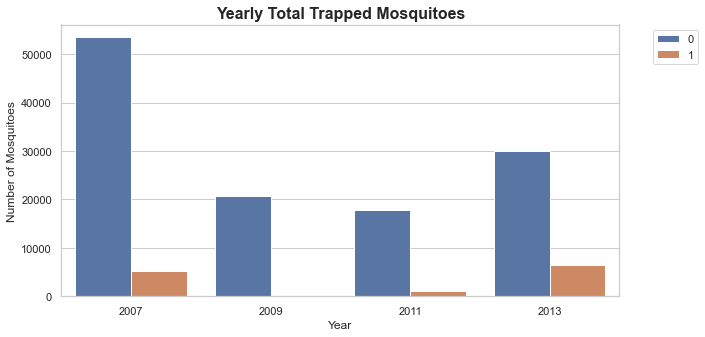

In [134]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(x = df_train['Year'], y = 'TotMosquitos', hue = 'WnvPresent', 
            data = df_train, estimator = sum, ci = None)
ax.set_title('Yearly Total Trapped Mosquitoes', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Mosquitoes')
ax.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

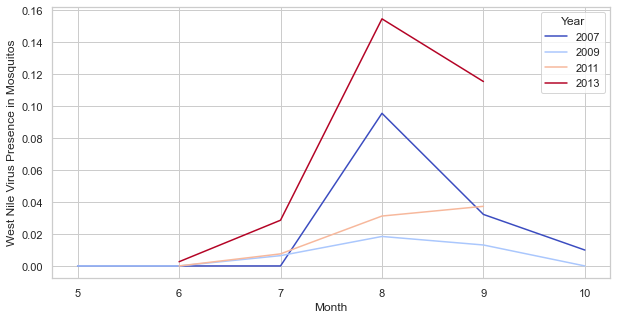

In [135]:
# Plot the presence of the WNV across the month for each year
plt.subplots(figsize = (10, 5))
sns.lineplot(x = 'Month', y = 'WnvPresent', hue = 'Year', data = df_train, ci = None, palette = 'coolwarm')
plt.ylabel("West Nile Virus Presence in Mosquitos")
plt.show()

- We observed a rise in the West Nile Virus among the trapped mosquitos in the month of August every year. 
- The number of mosquitos with virus dropped in the month of September and October with the exception of 2011.

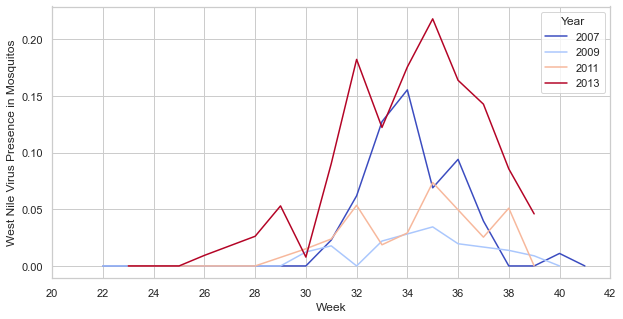

In [136]:
# Plot the presence of the WNV across the month for each year
plt.subplots(figsize = (10, 5))
sns.lineplot(x = 'Week', y = 'WnvPresent', hue = 'Year', data = df_train, ci = None, palette = 'coolwarm')
plt.ylabel("West Nile Virus Presence in Mosquitos")
plt.xticks(range(20, 43, 2))
plt.show()

- We observed a rise in the West Nile Virus in week 32 (2nd week of Aug) and 35 (1st week of Sep). 
- The life cycle of a mosquito typically takes 7 to 10 days ([*source*](https://www.cdc.gov/westnile/resources/pdfs/FS_MosquitoLifeCycle-508.pdf)). This explained the trend observed for the rise of the WNV in about 1 to 2 weeks.
- August wk no 31 to 34

#### - Total Virus Case vs Total Mosquitos

We first create new column with the info of total virus case found within the same date

In [137]:
df_train['TotWnvPresent'] = df_train.groupby(['Date'])['WnvPresent'].transform('sum')

In [138]:
df_train.groupby(['Date'])['WnvPresent'].sum()

Date
2007-05-29     0
2007-06-05     0
2007-06-26     0
2007-06-29     0
2007-07-02     0
              ..
2013-08-29    24
2013-09-06    20
2013-09-12    17
2013-09-19     9
2013-09-26     4
Name: WnvPresent, Length: 95, dtype: int64

Next, we will drop all the duplicates based on the date

In [139]:
total_case = df_train.drop_duplicates(subset = ['Date'])
total_case.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,TotMosquitos,TotWnvPresent,Year,Month,Week,Year Month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,0,2007,5,22,2007 05


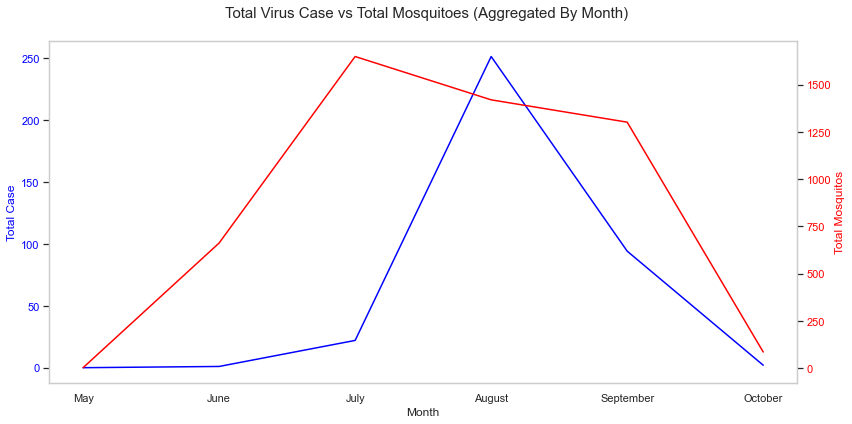

In [140]:
fig, ax_left = plt.subplots(figsize = (12, 6))
ax_right = ax_left.twinx()

ax_left.plot(total_case.groupby('Month')['TotWnvPresent'].sum(), color = 'blue')
ax_left.grid(False)
ax_left.set_xlabel('Month')
ticks_loc = ax_left.get_xticks().tolist()
ax_left.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax_left.set_xticklabels(['', 'May', 'June', 'July', 'August', 'September', 'October', ''])
ax_left.set_ylabel('Total Case', color = 'blue')
ax_left.tick_params(axis = 'y', labelcolor = 'blue')

ax_right.plot(total_case.groupby('Month')['TotMosquitos'].sum(), color = 'red')
ax_right.grid(False)
ax_right.set_ylabel('Total Mosquitos', color = 'red')
ax_right.tick_params(axis = 'y', labelcolor = 'red')

fig.tight_layout()
fig.suptitle('Total Virus Case vs Total Mosquitoes (Aggregated By Month)', size = 15)
fig.subplots_adjust(top = 0.90)

- Based on the graph, we can infer that the total number of case is correlated with the total mosquitoes found, with some lagged effect.  
The highest total case would be in August and the highest total mosquitoes found in July

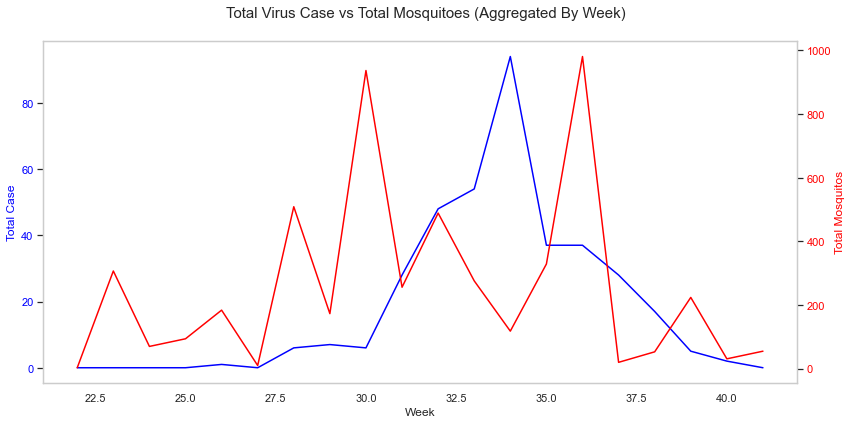

In [141]:
fig, ax_left = plt.subplots(figsize = (12, 6))
ax_right = ax_left.twinx()

ax_left.plot(total_case.groupby('Week')['TotWnvPresent'].sum(), color = 'blue')
ax_left.grid(False)
ax_left.set_xlabel('Week')
ax_left.set_ylabel('Total Case', color = 'blue')
ax_left.tick_params(axis = 'y', labelcolor = 'blue')

ax_right.plot(total_case.groupby('Week')['TotMosquitos'].sum(), color = 'red')
ax_right.grid(False)
ax_right.set_ylabel('Total Mosquitos', color = 'red')
ax_right.tick_params(axis = 'y', labelcolor = 'red')

fig.tight_layout()
fig.suptitle('Total Virus Case vs Total Mosquitoes (Aggregated By Week)', size = 15)
fig.subplots_adjust(top = 0.90)

- As for the week trend, we cannot see clear trend to both of the features. This may occur due to the interval of trap inspection that is not done weekly

#### - Distribution of Trapped Mosquitoes by Blocks

Text(0, 0.5, 'Number of Mosquitoes')

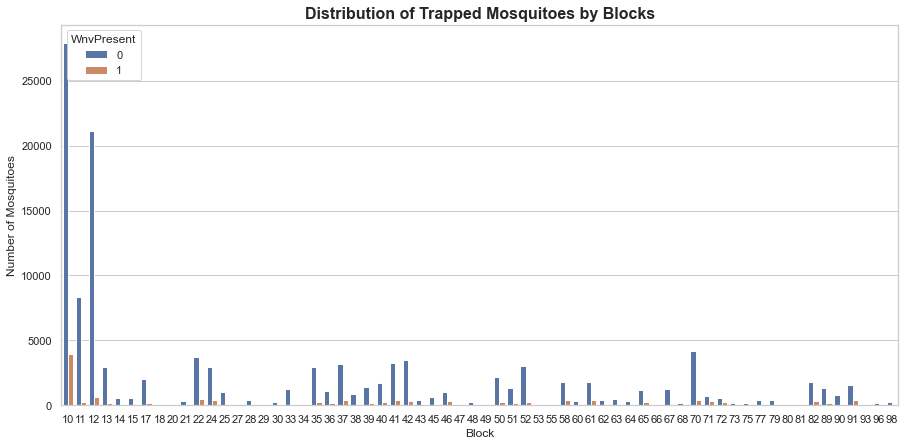

In [142]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.barplot(x = df_train['Block'], y = 'TotMosquitos', hue = 'WnvPresent', 
            data = df_train, estimator = sum, ci = None)
ax.set_title('Distribution of Trapped Mosquitoes by Blocks', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Block')
ax.set_ylabel('Number of Mosquitoes')
#ax.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

- Blocks 10, 11, 12 have significantly higher numbers of mosquitos compared to the other blocks.

#### - Mosquitoes Species

In [143]:
# Count number of species
print(f'Number of species: {df_train["Species"].nunique()}')
df_train["Species"].value_counts(normalize = True)

Number of species: 7


CULEX PIPIENS/RESTUANS    0.451445
CULEX RESTUANS            0.282360
CULEX PIPIENS             0.230088
CULEX TERRITANS           0.025487
CULEX SALINARIUS          0.009794
CULEX TARSALIS            0.000708
CULEX ERRATICUS           0.000118
Name: Species, dtype: float64

Text(0.5, 1.0, 'Total Number of Species')

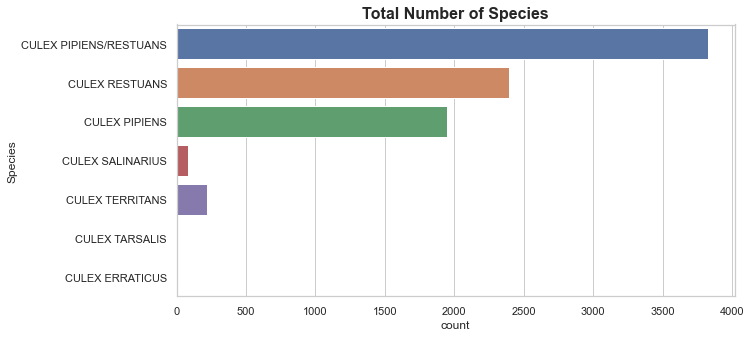

In [144]:
# Visualize the total number of species
plt.figure(figsize = (10, 5))
sns.countplot(y = df_train['Species'], data = df_train)
plt.title('Total Number of Species', fontsize = 16, fontweight = 'bold')

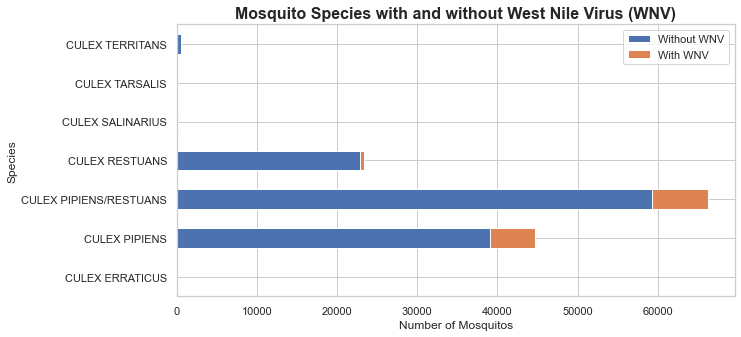

In [145]:
# Check and which species has the west nile virus
wnv_species = df_train.pivot_table(values = ['TotMosquitos'], index = 'Species', 
                                   columns = 'WnvPresent', aggfunc = 'sum')
#wnv_species = wnv_species.sort_values(by = wnv_species'TotMosquitos', ascending = True)
wnv_species.plot(kind = 'barh', stacked = True, figsize = (10, 5))
plt.title('Mosquito Species with and without West Nile Virus (WNV)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Mosquitos')
plt.legend(labels=['Without WNV', 'With WNV'])

- West Nile virus is spread by the Culex species of mosquito. The main vector species in the U.S. are Culex pipiens, Culex tarsalis, and Culex quinquefasciatus ([*source*](https://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health/))
- From the train dataset, most of the mosquito species caught are 'CULEX PIPIENS / RESTUANS', 'CULEX PIPIENS', and 'CULEX RESTUANS'. 
- A percentage of species caught were detected with the West Nile Virus.
- 'CULEX PIPIENS / RESTUANS' we would consider it as a combination of 'CULEX PIPIENS' and 'CULEX RESTUANS' found within the same trap


### Weather Dataset

In [146]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Station,2944.0,1.500000,0.500085,1.00,1.00,1.50,2.00,2.00
Tmax,2944.0,76.166101,11.461970,41.00,69.00,78.00,85.00,104.00
Tmin,2944.0,57.810462,10.381939,29.00,50.00,59.00,66.00,83.00
Tavg,2944.0,67.239300,10.538784,36.00,60.00,69.00,75.00,94.00
DewPoint,2944.0,53.457880,10.675181,22.00,46.00,54.00,62.00,75.00
WetBulb,2944.0,59.325747,9.289555,32.00,53.00,61.00,67.00,78.00
Heat,2944.0,3.417799,5.955153,0.00,0.00,0.00,5.00,29.00
Cool,2944.0,5.641304,6.104849,0.00,0.00,4.00,10.00,29.00
Sunrise,1472.0,480.646739,65.344729,416.00,424.75,446.50,531.25,623.00
Sunset,1472.0,1847.347826,87.050615,1647.00,1792.25,1859.50,1922.25,1931.00


#### Dropping Station 2 Data

In [147]:
# Check number of data for each station
df_weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [148]:
def subplot_histograms(df, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns) / 2))
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, sharex = False, sharey = True, squeeze = True, figsize = (15,25))
    plt.subplots_adjust(hspace = 0.5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        #ax[i].hist(df[column], bins = 50)
        ax[i].hist(df[df['Station'] == 1][column], bins = 20, alpha = 0.5, label = 'Station 1')
        ax[i].hist(df[df['Station'] == 2][column], bins = 20, alpha = 0.5, label = 'Station 2')
        ax[i].set_title(list_of_titles[i], fontweight = 'bold') 
        ax[i].set_xlabel(list_of_xlabels[i]) # Set titles, labels, etc here for each subplot
        ax[i].axvline(df[column].median(), color = 'r', linestyle = 'dashed', linewidth = 3, label = 'Median')
        ax[i].axvline(df[column].mean(), color = 'k', linestyle = 'dashed', linewidth = 3, label = 'Mean')
        ax[i].legend()

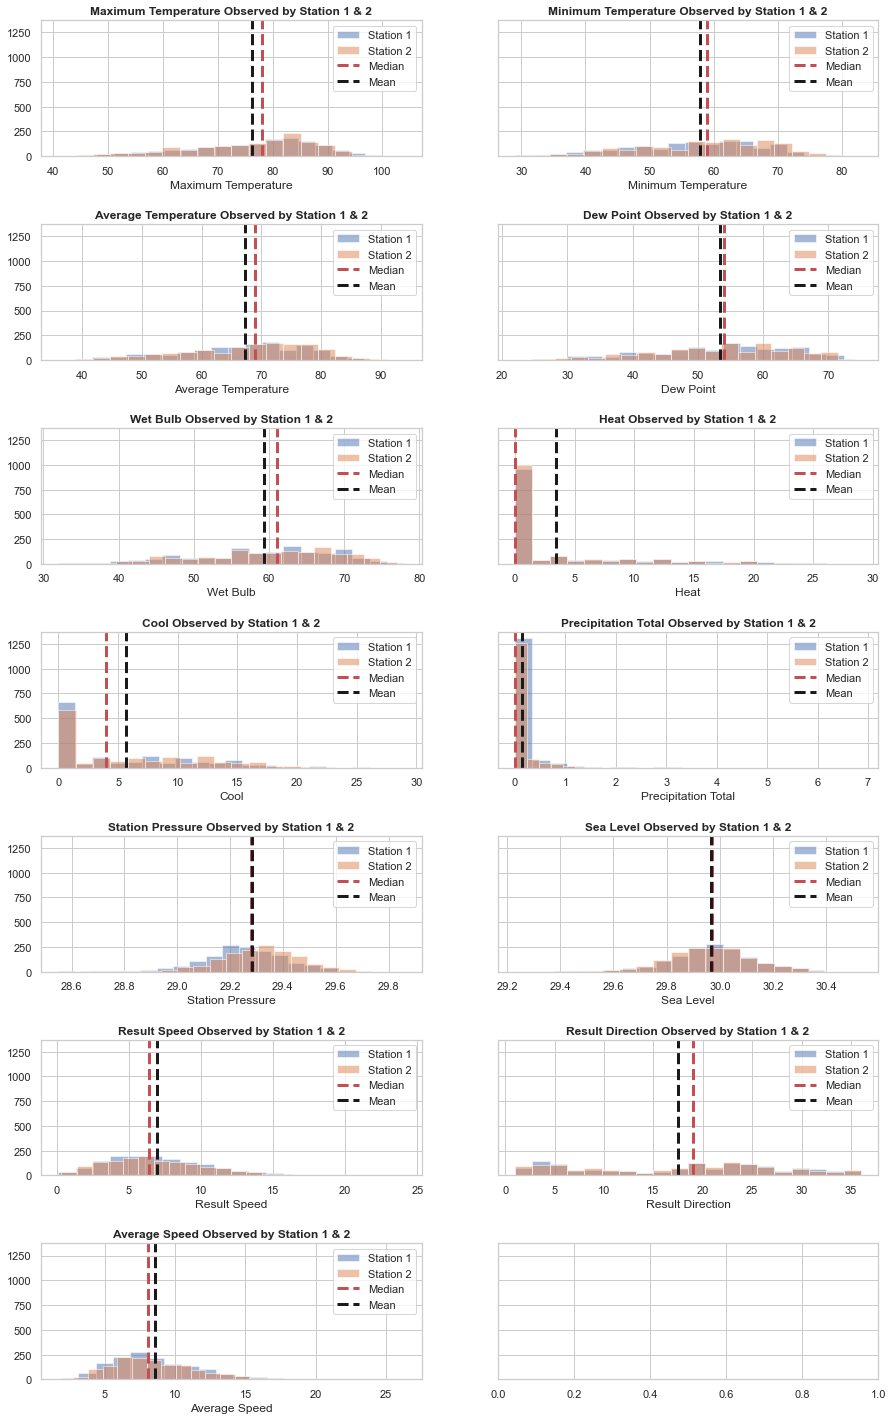

In [149]:
list_of_columns = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal','StnPressure',
                   'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

list_of_titles = ['Maximum Temperature Observed by Station 1 & 2', 'Minimum Temperature Observed by Station 1 & 2',
                  'Average Temperature Observed by Station 1 & 2', 'Dew Point Observed by Station 1 & 2',
                  'Wet Bulb Observed by Station 1 & 2','Heat Observed by Station 1 & 2', 
                  'Cool Observed by Station 1 & 2', 'Precipitation Total Observed by Station 1 & 2', 
                  'Station Pressure Observed by Station 1 & 2','Sea Level Observed by Station 1 & 2', 
                  'Result Speed Observed by Station 1 & 2','Result Direction Observed by Station 1 & 2',
                  'Average Speed Observed by Station 1 & 2']

list_of_xlabels= ['Maximum Temperature', 'Minimum Temperature', 'Average Temperature', 'Dew Point',
                  'Wet Bulb', 'Heat', 'Cool', 'Precipitation Total', 'Station Pressure', 'Sea Level', 'Result Speed',
                  'Result Direction', 'Average Speed']

subplot_histograms(df_weather, list_of_columns, list_of_titles, list_of_xlabels)

We observed the distribution and spread for each variable is similar for both stations. We will drop station 2 data.

In [150]:
# Subset station 1 weather data
df_weather_stn1 = df_weather[df_weather['Station'] == 1].copy()
df_weather_stn1.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CsNA,CsRA,CsBCFG,CsTS,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,448.0,...,1,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,447.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,446.0,...,1,0,0,0,0,0,0,0,0,0
6,1,2007-05-04,66,49,58.0,41,50.0,7.0,0.0,444.0,...,0,1,0,0,0,0,0,0,0,0
8,1,2007-05-05,66,53,60.0,38,49.0,5.0,0.0,443.0,...,1,0,0,0,0,0,0,0,0,0


#### Append TotWnvPresent & TotMosquitos to Weather Datasets

In [151]:
df_weather_v2 = df_weather_stn1.merge(total_case[['Date','TotWnvPresent','TotMosquitos']], how = 'left', on = 'Date')
df_weather_v2.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CsBCFG,CsTS,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS,TotWnvPresent,TotMosquitos
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,448.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,447.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,446.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,1,2007-05-04,66,49,58.0,41,50.0,7.0,0.0,444.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2007-05-05,66,53,60.0,38,49.0,5.0,0.0,443.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [152]:
df_weather_v2[['TotWnvPresent','TotMosquitos']] = df_weather_v2[['TotWnvPresent','TotMosquitos']].fillna(0.0)

In [153]:
# Create year, month, week and year month for weather dataset
date_creation(df_weather_v2, 'Date')
df_weather_v2.head(2)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CsSQ,CsFU,CsSN,CsVCTS,TotWnvPresent,TotMosquitos,Year,Month,Week,Year Month
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,448.0,...,0,0,0,0,0.0,0.0,2007,5,18,2007 05
1,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,447.0,...,0,0,0,0,0.0,0.0,2007,5,18,2007 05


In [154]:
df_weather_v2.describe().T

,count,mean,std,min,25%,50%,75%,max
Station,1472.0,1.000000,0.000000,1.00,1.00,1.000,1.00,1.00
Tmax,1472.0,75.978940,11.503150,42.00,68.00,78.000,85.00,103.00
Tmin,1472.0,56.730978,10.347907,29.00,49.00,58.000,65.00,82.00
Tavg,1472.0,66.606658,10.511437,36.00,60.00,68.000,75.00,93.00
DewPoint,1472.0,53.377717,10.670263,22.00,46.00,54.000,61.25,75.00
WetBulb,1472.0,59.057065,9.326147,32.00,53.00,60.000,66.00,78.00
Heat,1472.0,3.631114,6.133829,0.00,0.00,0.000,5.00,29.00
Cool,1472.0,5.237772,5.899382,0.00,0.00,3.000,10.00,28.00
Sunrise,1472.0,480.646739,65.344729,416.00,424.75,446.500,531.25,623.00
Sunset,1472.0,1847.347826,87.050615,1647.00,1792.25,1859.500,1922.25,1931.00


#### Trend Across Weather Dataset Features

##### - Average Temperature

In [155]:
#function to plot the line graph of feature1 and feature2 using the mean for feature2
def PlotMean(f1, f2):
    fig, ax_left = plt.subplots(figsize = (12, 6))
    ax_right = ax_left.twinx()

    ax_left.plot(df_weather_v2.groupby('Month')[f1].sum(), color = 'blue')
    ax_left.set_xlabel('Month')
    ax_left.grid(False)
    ticks_loc = ax_left.get_xticks().tolist()
    ax_left.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax_left.set_xticklabels(['', 'May', 'June', 'July', 'August', 'September', 'October', ''])
    ax_left.set_ylabel(f1, color = 'blue')
    ax_left.tick_params(axis = 'y', labelcolor = 'blue')

    ax_right.plot(df_weather_v2.groupby('Month')[f2].mean(), color = 'red')
    ax_right.grid(False)
    ax_right.set_ylabel(f2, color = 'red')
    ax_right.tick_params(axis = 'y', labelcolor = 'red')

    fig.tight_layout()
    fig.suptitle('{} vs {} (Aggregated By Month)'.format(f1,f2), size = 15)
    fig.subplots_adjust(top = 0.90)

In [156]:
#function to plot the line graph of feature1 and feature2 using the sum for feature2
def PlotSum(f1, f2):
    fig, ax_left = plt.subplots(figsize = (12, 6))
    ax_right = ax_left.twinx()

    ax_left.plot(df_weather_v2.groupby('Month')[f1].sum(), color = 'blue')
    ax_left.set_xlabel('Month')
    ax_left.grid(False)
    ticks_loc = ax_left.get_xticks().tolist()
    ax_left.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax_left.set_xticklabels(['', 'May', 'June', 'July', 'August', 'September', 'October', ''])
    ax_left.set_ylabel(f1, color = 'blue')
    ax_left.tick_params(axis = 'y', labelcolor = 'blue')

    ax_right.plot(df_weather_v2.groupby('Month')[f2].sum(), color = 'red')
    ax_right.grid(False)
    ax_right.set_ylabel(f2, color = 'red')
    ax_right.tick_params(axis = 'y', labelcolor = 'red')

    fig.tight_layout()
    fig.suptitle('{} vs {} (Aggregated By Month)'.format(f1,f2), size = 15)
    fig.subplots_adjust(top = 0.90)

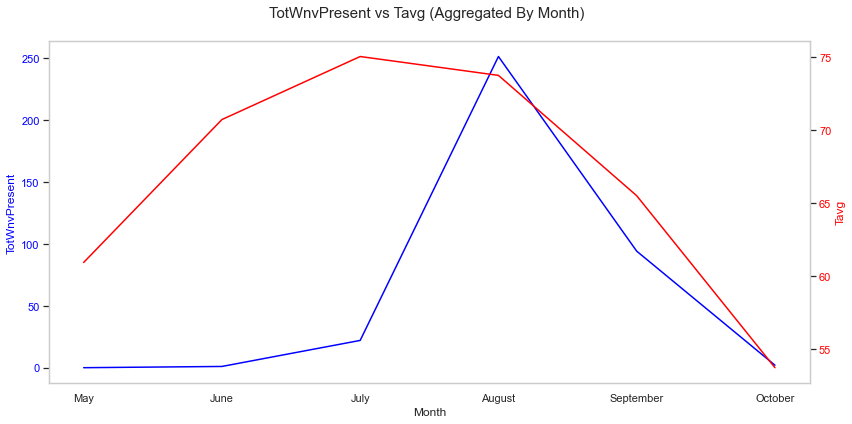

In [157]:
PlotMean('TotWnvPresent', 'Tavg')

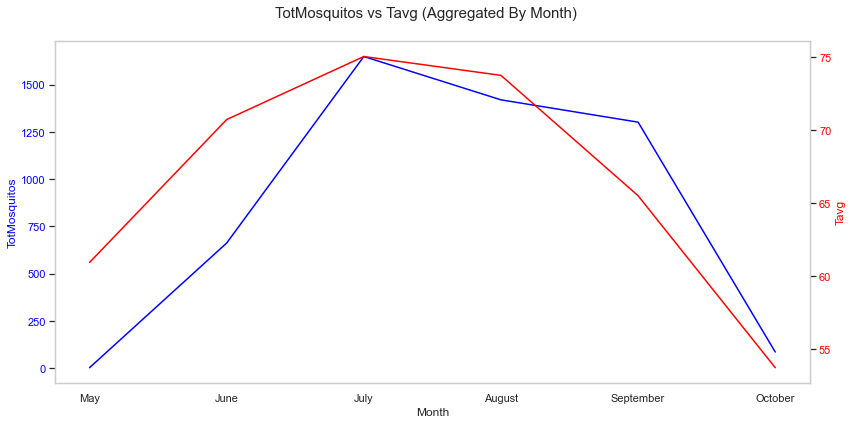

In [158]:
PlotMean('TotMosquitos', 'Tavg')

Generally, the temperature increase from May to August and peak in July before starting to decrease from August. It shows some lagged effect from the average temperature to the total mosquitoes and total case.

##### - Dew Point

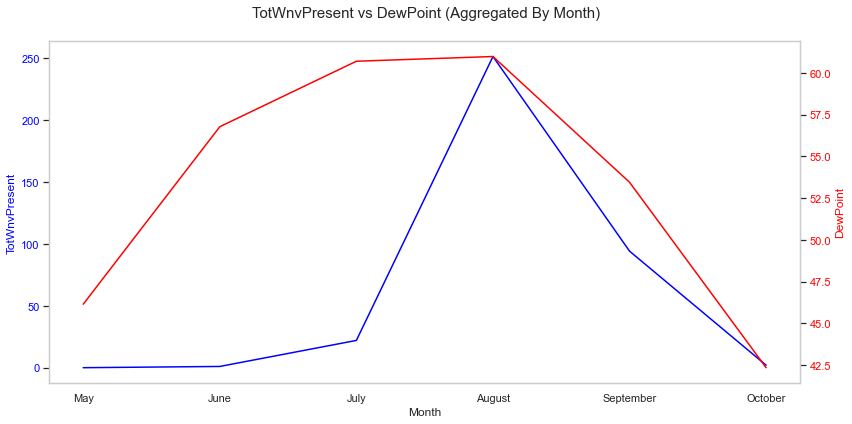

In [159]:
PlotMean('TotWnvPresent','DewPoint')

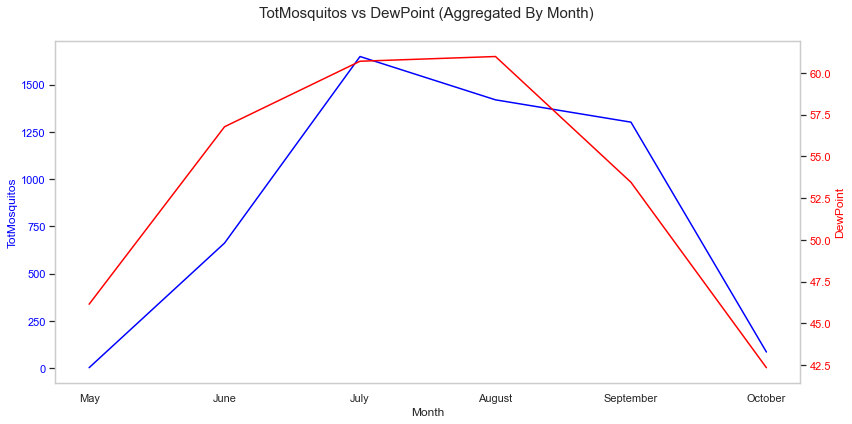

In [160]:
PlotMean('TotMosquitos','DewPoint')

- Increase in both the number of mosquitos trapped and WNV is observed when the dew point increased as well.

##### - Total Precipitation

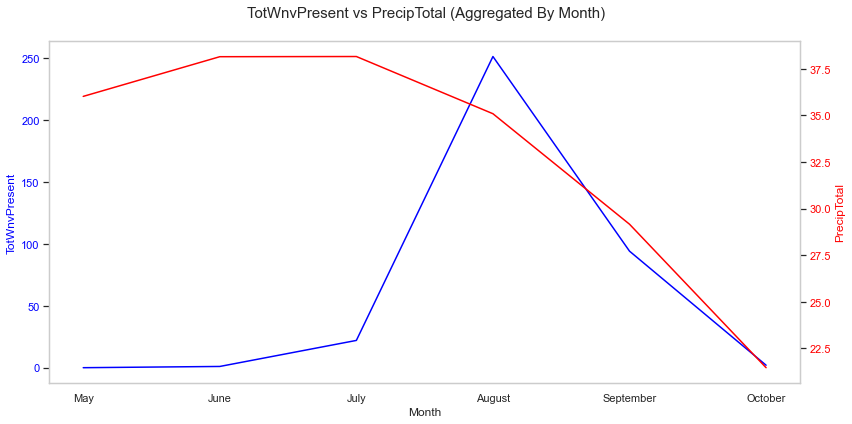

In [161]:
PlotSum('TotWnvPresent','PrecipTotal')

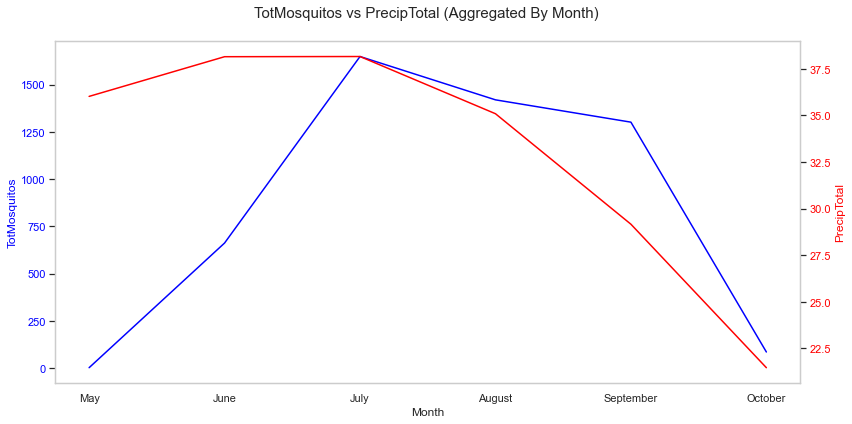

In [162]:
PlotSum('TotMosquitos','PrecipTotal')

- Total Precipitation seems to have an influence in the number of mosquitos trapped and WNV presence. The lower the total precipitation, the lower the number of mosquitoes and total case with some lag.

##### - Heat & Cool

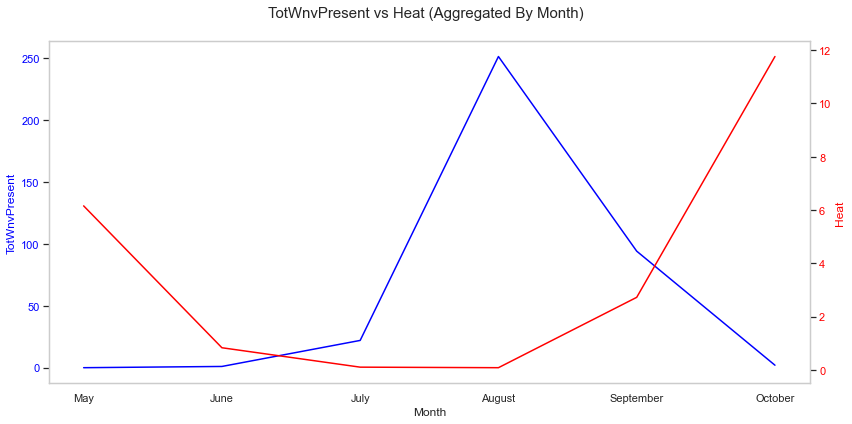

In [163]:
PlotMean('TotWnvPresent','Heat')

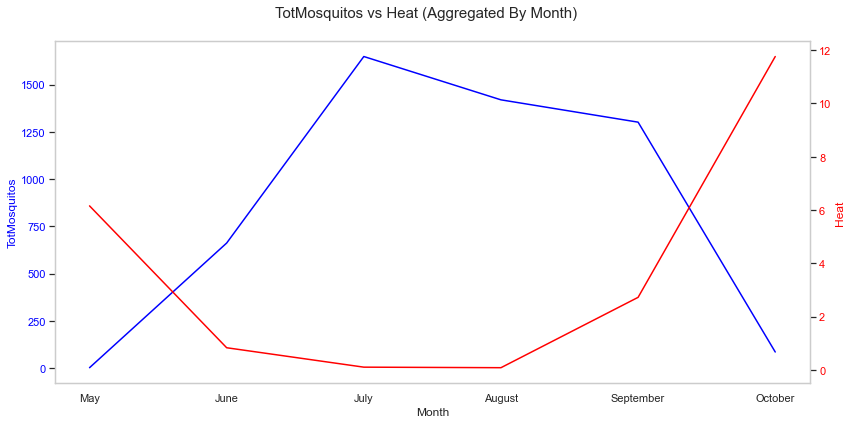

In [164]:
PlotMean('TotMosquitos','Heat')

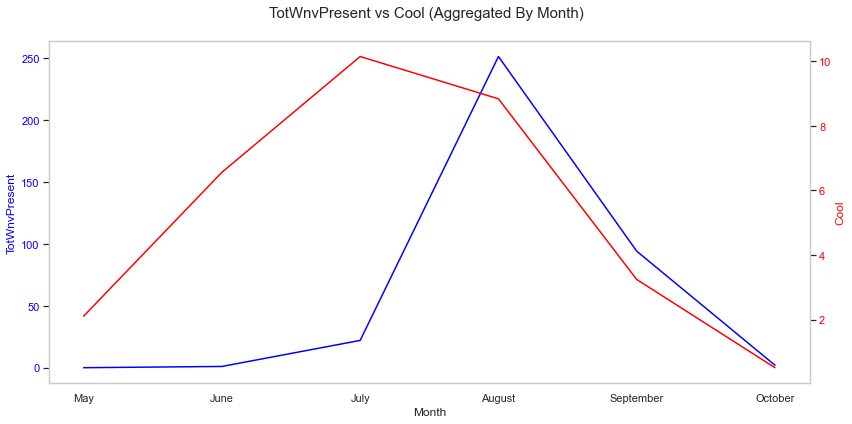

In [165]:
PlotMean('TotWnvPresent','Cool')

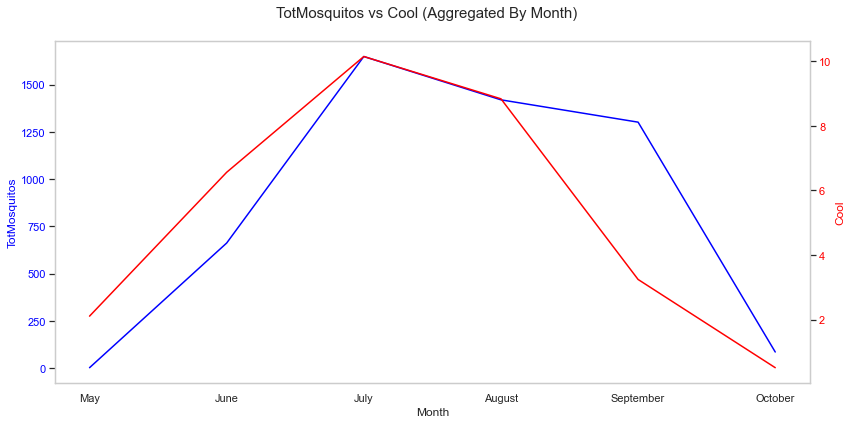

In [166]:
PlotMean('TotMosquitos','Cool')

- Heat seems to have an inverse relationship with the total mosquitoes and total case, while cool seems to have similar relationship with the Average Temperature.  

##### - Station Pressure & Sea Level

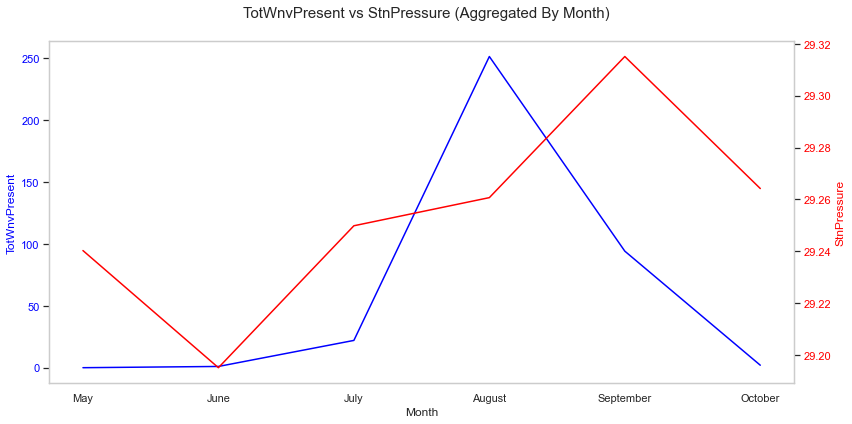

In [167]:
PlotMean('TotWnvPresent','StnPressure')

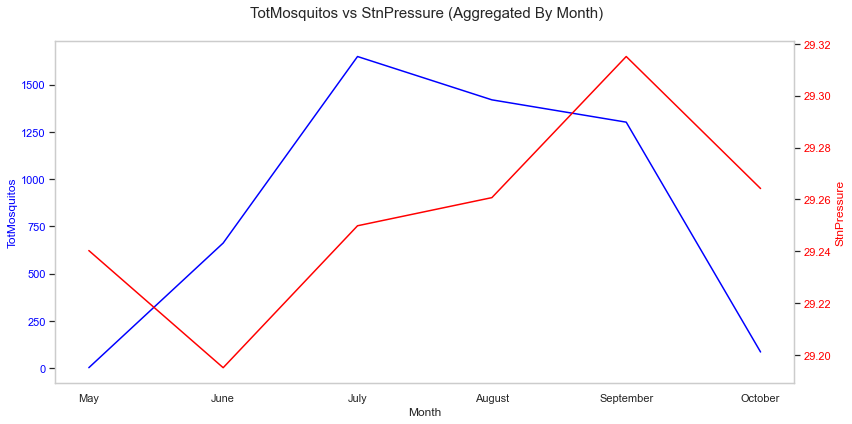

In [168]:
PlotMean('TotMosquitos','StnPressure')

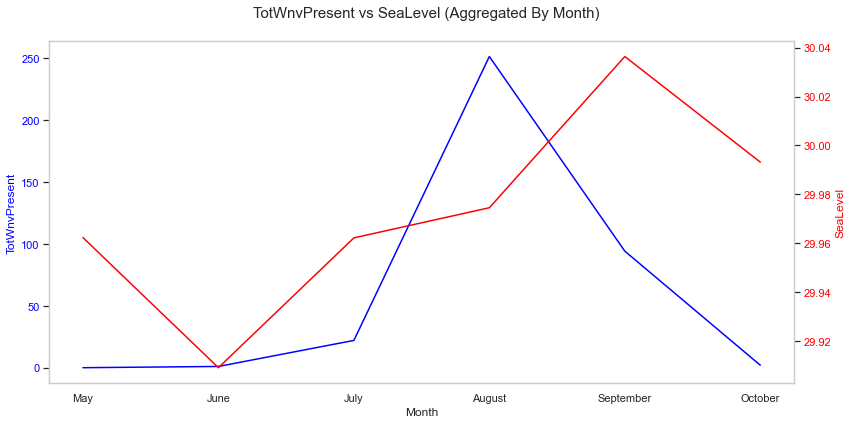

In [169]:
PlotMean('TotWnvPresent','SeaLevel')

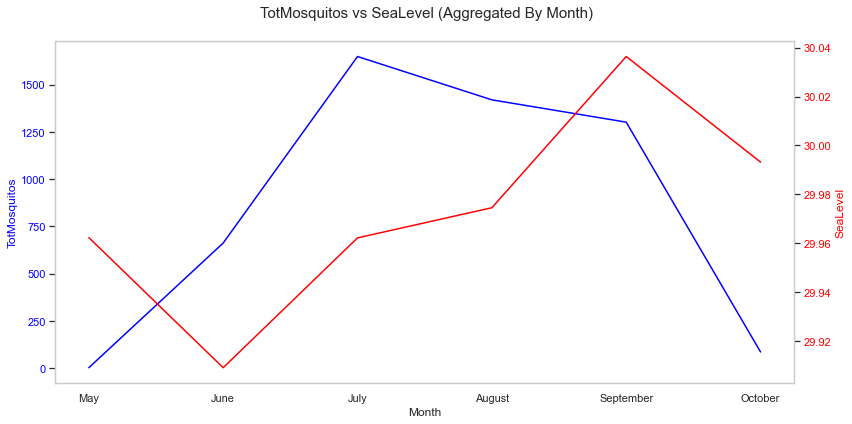

In [170]:
PlotMean('TotMosquitos','SeaLevel')

The Station pressure and sea level do not have significant impact on the total mosquitoes and total case.

##### - Result Speed & Average Speed

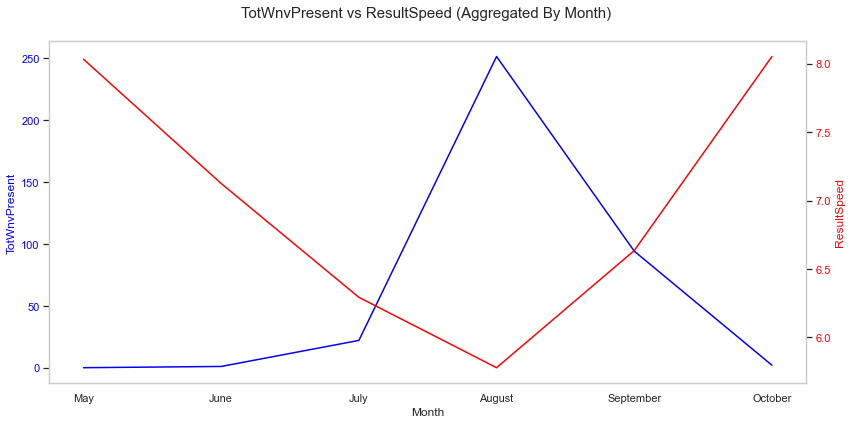

In [171]:
PlotMean('TotWnvPresent','ResultSpeed')

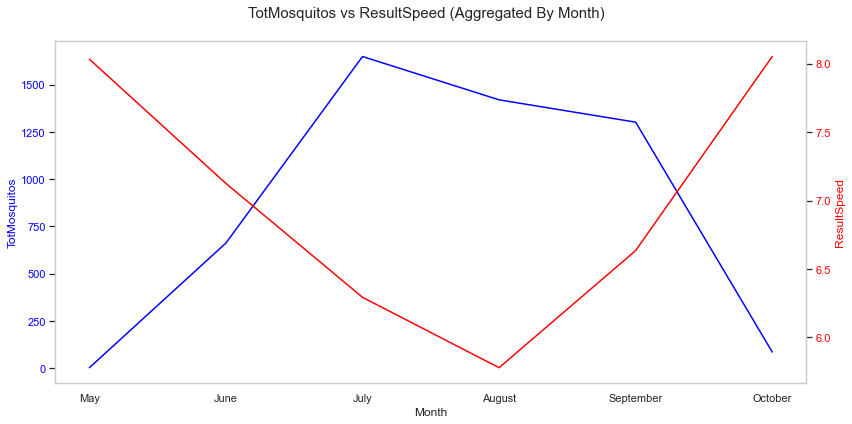

In [172]:
PlotMean('TotMosquitos','ResultSpeed')

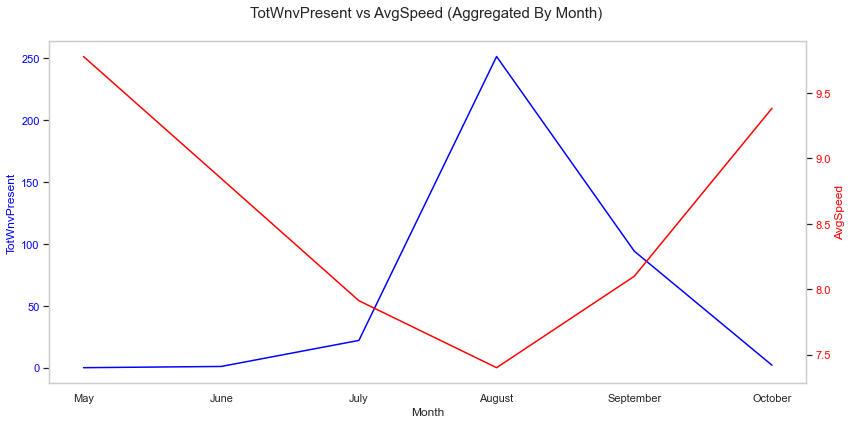

In [173]:
PlotMean('TotWnvPresent','AvgSpeed')

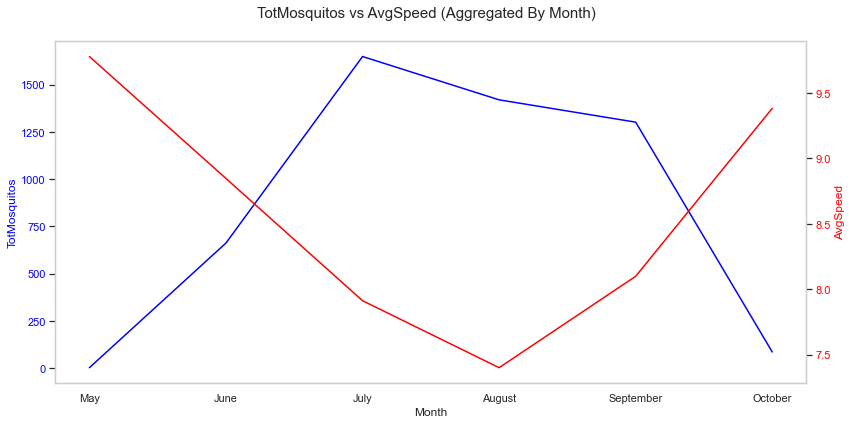

In [174]:
PlotMean('TotMosquitos','AvgSpeed')

Result speed and the average wind speed observed have a reverse relationship with the total mosquitoes and total case.

#### Merging Train and Weather Dataset

We will merge the train and station 1 weather datasets for EDA analysis.

In [175]:
# Merge df_train and df_weather
df_merged = pd.merge(df_train, df_weather_stn1, on = ['Date'])
df_merged = df_merged.drop(columns = ['TotWnvPresent'])
df_merged.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CsNA,CsRA,CsBCFG,CsTS,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0,0,0,0,0,0,0


Some of the weather conditions for CodeSum is 0. We will drop these columns.

In [176]:
# List the columns to drop
columns_to_drop = ['CsVCFG', 'CsSN', 'CsFG+', 'CsBCFG', 'CsMIFG', 'CsGR', 'CsSQ', 'CsFU']
drop_columns(df_merged, columns_to_drop)

In [177]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8474
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8475 non-null   datetime64[ns]
 1   Address                 8475 non-null   object        
 2   Species                 8475 non-null   object        
 3   Block                   8475 non-null   int64         
 4   Street                  8475 non-null   object        
 5   Trap                    8475 non-null   object        
 6   AddressNumberAndStreet  8475 non-null   object        
 7   Latitude                8475 non-null   float64       
 8   Longitude               8475 non-null   float64       
 9   AddressAccuracy         8475 non-null   int64         
 10  NumMosquitos            8475 non-null   int64         
 11  WnvPresent              8475 non-null   int64         
 12  TotMosquitos            8475 non-null   int64   

##### - Correlation Matrix 

In [178]:
# create a temporary dataframe and drop categorical data and variables that are not present in test set
df = df_merged.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 
                     'TotMosquitos', 'NumMosquitos', 'Year', 'Month', 'Week', 'Year Month', 'Station', 
                     'Latitude', 'Longitude'], axis = 1)
df.head()

,Species,Trap,WnvPresent,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,...,AvgSpeed,CsHZ,CsTSRA,CsDZ,CsBR,CsNA,CsRA,CsTS,CsFG,CsVCTS
0,CULEX PIPIENS/RESTUANS,T002,0,88,60,74.0,58,65.0,0.0,9.0,...,6.5,1,0,0,1,0,0,0,0,0
1,CULEX RESTUANS,T002,0,88,60,74.0,58,65.0,0.0,9.0,...,6.5,1,0,0,1,0,0,0,0,0
2,CULEX RESTUANS,T007,0,88,60,74.0,58,65.0,0.0,9.0,...,6.5,1,0,0,1,0,0,0,0,0
3,CULEX PIPIENS/RESTUANS,T015,0,88,60,74.0,58,65.0,0.0,9.0,...,6.5,1,0,0,1,0,0,0,0,0
4,CULEX RESTUANS,T015,0,88,60,74.0,58,65.0,0.0,9.0,...,6.5,1,0,0,1,0,0,0,0,0


In [179]:
# Generate correlation matrix
df_corr = df.corr()
df_corr

,WnvPresent,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,...,AvgSpeed,CsHZ,CsTSRA,CsDZ,CsBR,CsNA,CsRA,CsTS,CsFG,CsVCTS
WnvPresent,1.000000,0.044483,0.072511,0.062659,0.083045,0.074365,-0.052920,0.056462,0.094998,-0.062255,...,-0.039980,0.028942,0.056528,-0.023850,0.016263,-0.050696,0.032585,0.054214,0.023053,-0.031829
Tmax,0.044483,1.000000,0.744417,0.938483,0.745475,0.855566,-0.764694,0.860638,-0.110368,0.207802,...,0.014396,0.299665,0.115273,-0.129511,0.033939,-0.152673,-0.125682,0.190199,0.037200,0.113967
Tmin,0.072511,0.744417,1.000000,0.928216,0.900952,0.929816,-0.675196,0.894721,-0.188950,0.289865,...,0.164425,0.220133,0.321767,-0.023825,0.240521,-0.348003,0.211966,0.355514,0.098594,0.138271
Tavg,0.062659,0.938483,0.928216,1.000000,0.876242,0.953414,-0.771828,0.940101,-0.159559,0.265100,...,0.091863,0.284350,0.231860,-0.087599,0.143256,-0.265687,0.036814,0.291413,0.074759,0.128733
DewPoint,0.083045,0.745475,0.900952,0.876242,1.000000,0.971283,-0.635555,0.845606,-0.088423,0.183239,...,0.120259,0.290033,0.386667,-0.015929,0.391315,-0.523332,0.334494,0.429657,0.122010,0.169319
WetBulb,0.074365,0.855566,0.929816,0.953414,0.971283,1.000000,-0.710450,0.909936,-0.130069,0.229675,...,0.099330,0.284078,0.321867,-0.054333,0.290510,-0.425431,0.209563,0.377101,0.092341,0.152222
Heat,-0.052920,-0.764694,-0.675196,-0.771828,-0.635555,-0.710450,1.000000,-0.508846,0.189202,-0.273396,...,-0.009361,-0.130110,-0.136039,-0.047484,0.022622,0.050148,0.061352,-0.146789,-0.040170,-0.053428
Cool,0.056462,0.860638,0.894721,0.940101,0.845606,0.909936,-0.508846,1.000000,-0.114589,0.212344,...,0.119356,0.315228,0.240981,-0.144059,0.206084,-0.332829,0.082737,0.315848,0.079680,0.145648
Sunrise,0.094998,-0.110368,-0.188950,-0.159559,-0.088423,-0.130069,0.189202,-0.114589,1.000000,-0.961202,...,-0.116512,0.086621,-0.051930,0.133289,-0.116230,0.007225,-0.044380,-0.074485,0.159206,-0.136449
Sunset,-0.062255,0.207802,0.289865,0.265100,0.183239,0.229675,-0.273396,0.212344,-0.961202,1.000000,...,0.084244,-0.066097,0.032982,-0.167068,0.082252,-0.023335,0.040051,0.056975,-0.193921,0.133284


Text(0.5, 1.0, 'Correlation Matrix')

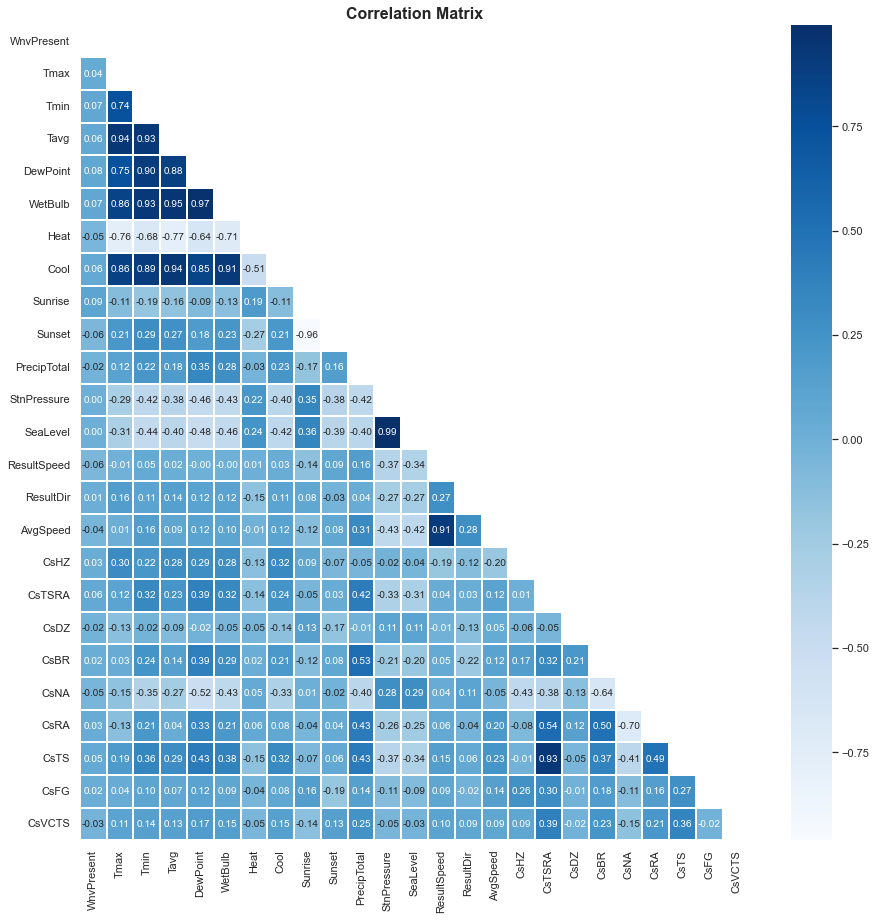

In [180]:
# Plot heatmap
plt.figure(figsize = (15, 15))

# Create the matrix to mask the correlation matrix
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot = True, cmap = 'Blues', fmt = '.2f', linewidths = 2, mask = matrix, 
            annot_kws = {'fontsize': 10})

# Set the label
plt.title('Correlation Matrix', loc = 'center', fontsize = 16, fontweight = 'bold')

Remarks:  
- There are high multicollinearity between Tavg, Tmax, Tmin, DewPoint and Cool (r > 0.7)
- Meanwhile, Heat has a high inverse collinearity with the temperature features (r > -0.7)
- Sea Level and StnPressure also have high correlation with each other (r > 0.99)
- Average Speed and ResultSpeed has r value of 0.91 indicating high collinearity


<AxesSubplot:title={'center':'Heatmap showing correlation of features with target'}>

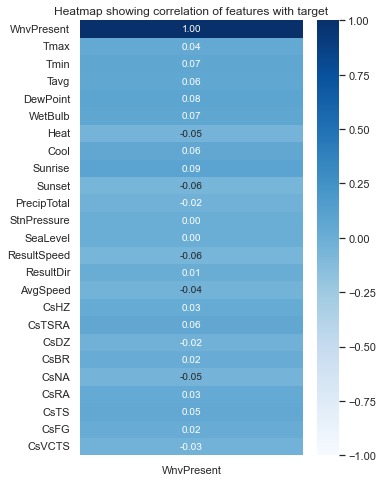

In [181]:
plt.figure(figsize = (5, 8))
plt.title('Heatmap showing correlation of features with target')
sns.heatmap(df.corr()[['WnvPresent']], annot = True, cmap = 'Blues', fmt = '.2f', 
            annot_kws = {'fontsize': 10}, vmin = -1, vmax = 1)

Meanwhile, there is no significant correlation to the target as the target dataset is highly imbalanced.

### Spray Dataset

In [182]:
# Check the unique dates
df_spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
Name: Date, dtype: int64

In [183]:
df_spray.describe()

,Latitude,Longitude
count,14199.000000,14199.000000
mean,41.898456,-87.732111
std,0.097461,0.061096
min,41.713925,-87.871023
25%,41.782290,-87.788612
50%,41.937205,-87.724390
75%,41.976710,-87.691572
max,42.018907,-87.586727


In [184]:
date_creation(df_spray, 'Date')

In [185]:
df_spray['Spray'] = np.ones((len(df_spray),), dtype = 'int')

In [186]:
df_spray.head()

,Date,Time,Latitude,Longitude,Year,Month,Week,Year Month,Spray
95,2011-09-07,7:52:52 PM,41.981433,-87.787777,2011,9,36,2011 09,1
96,2011-09-07,7:53:02 PM,41.980998,-87.787778,2011,9,36,2011 09,1
97,2011-09-07,7:53:12 PM,41.980560,-87.787762,2011,9,36,2011 09,1
98,2011-09-07,7:53:22 PM,41.980198,-87.787758,2011,9,36,2011 09,1
99,2011-09-07,7:53:32 PM,41.979752,-87.787765,2011,9,36,2011 09,1


#### - Total Mosquitoes and Case vs Total Spray

In [187]:
df_spray.groupby('Month').count()

,Date,Time,Latitude,Longitude,Year,Week,Year Month,Spray
Month,,,,,,,,
7,3809,3809,3809,3809,3809,3809,3809,3809
8,7893,7893,7893,7893,7893,7893,7893,7893
9,2497,1913,2497,2497,2497,2497,2497,2497


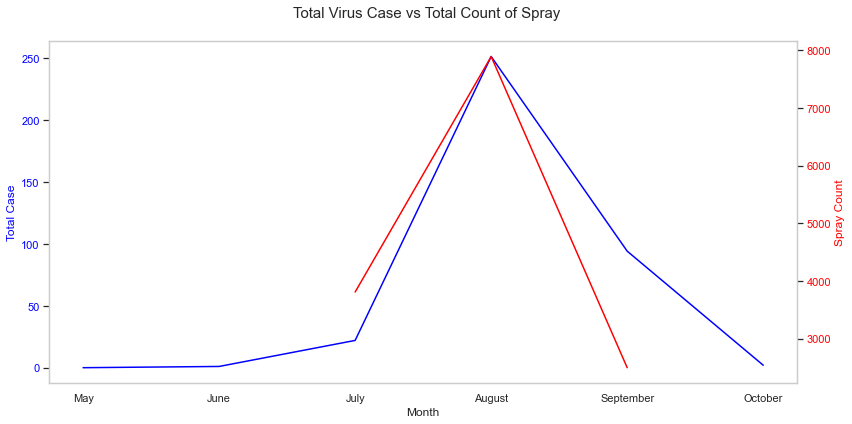

In [188]:
fig, ax_left = plt.subplots(figsize = (12, 6))
ax_right = ax_left.twinx()

ax_left.plot(total_case.groupby('Month')['TotWnvPresent'].sum(), color = 'blue')
ax_left.set_xlabel('Month')
ax_left.grid(False)
ticks_loc = ax_left.get_xticks().tolist()
ax_left.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax_left.set_xticklabels(['', 'May', 'June', 'July', 'August', 'September', 'October', ''])
ax_left.set_ylabel('Total Case', color = 'blue')
ax_left.tick_params(axis = 'y', labelcolor = 'blue')

ax_right.plot(df_spray.groupby('Month')['Date'].count(), color = 'red')
ax_right.grid(False)
ax_right.set_ylabel('Spray Count', color = 'red')
ax_right.tick_params(axis = 'y', labelcolor = 'red')

fig.tight_layout()
fig.suptitle('Total Virus Case vs Total Count of Spray', size = 15)
fig.subplots_adjust(top = 0.90)

The total spray seems to be following the trend of the total case emerged. This may indicate that the spray control is deployed after cases are found in the neighbourhood.

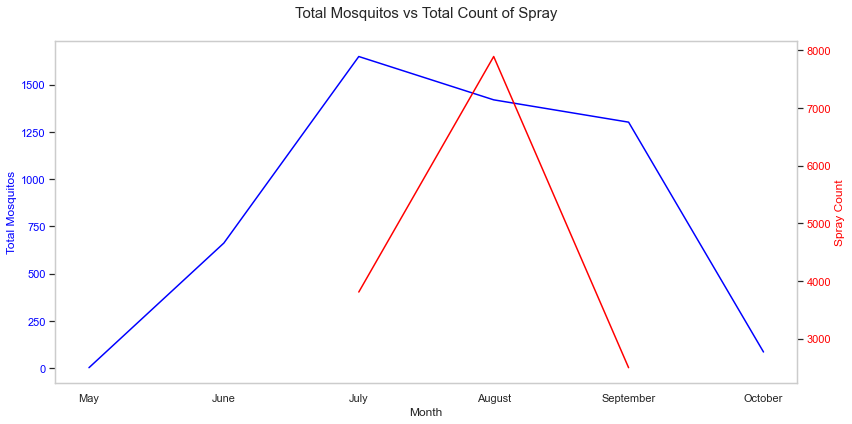

In [189]:
fig, ax_left = plt.subplots(figsize = (12, 6))
ax_right = ax_left.twinx()

ax_left.plot(total_case.groupby('Month')['TotMosquitos'].sum(), color = 'blue')
ax_left.grid(False)
ax_left.set_xlabel('Month')
ticks_loc = ax_left.get_xticks().tolist()
ax_left.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax_left.set_xticklabels(['', 'May', 'June', 'July', 'August', 'September', 'October', ''])
ax_left.set_ylabel('Total Mosquitos', color = 'blue')
ax_left.tick_params(axis = 'y', labelcolor = 'blue')

ax_right.plot(df_spray.groupby('Month')['Date'].count(), color = 'red')
ax_right.grid(False)
ax_right.set_ylabel('Spray Count', color = 'red')
ax_right.tick_params(axis = 'y', labelcolor = 'red')

fig.tight_layout()
fig.suptitle('Total Mosquitos vs Total Count of Spray', size = 15)
fig.subplots_adjust(top = 0.90)

Based on the graph, we can infer that even though the mosquitoes count is increasing from May, no actions has been taken to control the mosquito population. When the spray started, we can see there is a decrease in the total mosquitoes.

#### - Map of Spray Area and Case Found with Chicago Neighborhood

Inital observation that location with latitude 42.395983 and longitude -88.096468 seems a bit far off from the others. We will remove the relevant data.

In [190]:
df_spray = df_spray[df_spray['Latitude'] < 42.1]

In [191]:
virus = df_train.groupby(['Latitude','Longitude']).sum()
virus

,,Block,AddressAccuracy,NumMosquitos,WnvPresent,TotMosquitos,TotWnvPresent,Year,Month,Week
Latitude,Longitude,,,,,,,,,
41.644612,-87.604498,1230,75,124,1,129,182,30105,126,512
41.659112,-87.538693,3680,736,881,6,1699,477,184960,714,2971
41.662014,-87.724608,6174,1176,1902,4,3122,732,295441,1097,4506
41.673408,-87.599862,1716,715,2617,4,21668,570,287415,1084,4487
41.678618,-87.559308,1300,500,780,0,1368,149,200886,791,3290
...,...,...,...,...,...,...,...,...,...,...
42.008314,-87.777921,7910,1017,1901,8,2668,678,227123,845,3474
42.009876,-87.807277,3266,414,565,5,758,396,92566,366,1508
42.010412,-87.662140,756,504,121,0,121,384,126653,465,1907


In [192]:
virus_7 = df_train[df_train['Month'] == 7].groupby(['Latitude','Longitude']).sum()
virus_8 = df_train[df_train['Month'] == 8].groupby(['Latitude','Longitude']).sum()
virus_9 = df_train[df_train['Month'] == 9].groupby(['Latitude','Longitude']).sum()

In [193]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station1 = (41.995, -87.933)
station2 = (41.786, -87.752)

# generate plot
plt.figure(figsize = (25, 15))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = [origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_spray[df_spray['Month'] == 7], ec = None, 
                color = 'g', linewidth = 0)
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = virus_7[virus_7['WnvPresent'] > 0], ec = None, 
                color = 'r', size = 'WnvPresent', sizes = (50, 200))
# plt.scatter(x = df_train['Longitude'], y = df_train['Latitude'], c = 'r', s = 20)
# plt.scatter(x = station1[1], y = station1[0], c = 'b', s = 60, marker = 's')
# plt.scatter(x = station2[1], y = station2[0], c = 'b', s = 60, marker = 's')
plt.title('The Map of Chicago with Total Case and Spray Area on July')

plt.legend(title = 'Total Case', labelspacing = 1.5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/mapdata_copyright_openstreetmap_contributors.txt'

In July, we can see that the spray control has been done in 3 different areas. Meanwhile, cases are popping all over the city. 

In [194]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station1 = (41.995, -87.933)
station2 = (41.786, -87.752)

# generate plot
plt.figure(figsize = (25, 15))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = [origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_spray[df_spray['Month'] == 8], ec = None, 
                color = 'g', linewidth = 0)
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = virus_8[virus_8['WnvPresent'] > 0], ec = None, 
                color = 'r', size = 'WnvPresent', sizes = (50, 200))
# plt.scatter(x = df_train['Longitude'], y = df_train['Latitude'], c = 'r', s = 20)
# plt.scatter(x = station1[1], y = station1[0], c = 'b', s = 60, marker = 's')
# plt.scatter(x = station2[1], y = station2[0], c = 'b', s = 60, marker = 's')
plt.title('The Map of Chicago with Total Case and Spray Area on August')

plt.legend(title = 'Total Case', labelspacing = 1.5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/mapdata_copyright_openstreetmap_contributors.txt'

In August, the similar trend of July continues. Less spray control over the cases found in the areas.

In [195]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station1 = (41.995, -87.933)
station2 = (41.786, -87.752)

# generate plot
plt.figure(figsize = (25, 15))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = [origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_spray[df_spray['Month'] == 9], ec = None, 
                color = 'g', linewidth = 0)
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = virus_9[virus_9['WnvPresent'] > 0], ec = None, 
                color = 'r', size = 'WnvPresent', sizes = (50, 200))
# plt.scatter(x = df_train['Longitude'], y = df_train['Latitude'], c = 'r', s = 20)
# plt.scatter(x = station1[1], y = station1[0], c = 'b', s = 60, marker = 's')
# plt.scatter(x = station2[1], y = station2[0], c = 'b', s = 60, marker = 's')
plt.title('The Map of Chicago with Total Case and Spray Area on September')

plt.legend(title = 'Total Case', labelspacing = 1.5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/mapdata_copyright_openstreetmap_contributors.txt'

**Remarks:**  
- During the month of September which is the peak of the case emergence, the government only done the mosquito control on one part of neighbourhood, while there are multiple sightings in other areas as well . 
- Based on the observation, it suggests that the government initate the mosquito control after there is initial sighting or report of virus case around the area instead of the initial sighting of mosquitoes. This may allow for mosquitoes to spread to different parts of the city and start new breeding. This resulted in more mosquitoes in different areas, thus reflecting the increase in cases as well. 

## Feature Engineering

### Relative Humidity

Relative humidity is one of the factors that influence the breed of the mosquitos ([source](https://parasitesandvectors.biomedcentral.com/track/pdf/10.1186/1756-3305-6-129.pdf)). We will add this as a new feature to the dataset.

([Source](https://www.omnicalculator.com/physics/relative-humidity)) for formula to calculate relative humidity

In [196]:
# Create a function to convert farenheit to celcius
def convert_farenheit_to_celcius(x):
    temp = (x - 32) / 1.8
    return temp

In [197]:
# Create a function to calculate relative humidity
def relative_humidity(avg_temp, dew_point):
    avg_temp = convert_farenheit_to_celcius(avg_temp)
    dew_point = convert_farenheit_to_celcius(dew_point)
    e0 = np.exp((17.625 * dew_point) / (243.04 + dew_point))
    e1 = np.exp((17.625 * avg_temp) / (243.04 + avg_temp))
    return 100 * (e0 / e1)

In [198]:
# Create a column for relative humidity
df_merged['RelativeHumidity'] = df_merged.apply(lambda x: relative_humidity(x['Tavg'], x['DewPoint']), axis = 1)

In [199]:
df_merged.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CsHZ,CsTSRA,CsDZ,CsBR,CsNA,CsRA,CsTS,CsFG,CsVCTS,RelativeHumidity
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1,0,0,1,0,0,0,0,0,57.398449
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1,0,0,1,0,0,0,0,0,57.398449


In [200]:
# Subset relative humidity data
relative_humidity = df_merged[['RelativeHumidity', 'TotMosquitos', 'WnvPresent']].groupby('RelativeHumidity').sum()

In [201]:
# Create a function to plot line graph
def subplot_line(df, title_list, xlabel):
    plt.subplots(figsize = (15,6))

    plt.subplot(121)
    sns.lineplot(x = df.index, y = 'TotMosquitos', data = df, ci = None)
    plt.xlabel(xlabel)
    plt.ylabel('Total Mosquitos Trapped')
    plt.title(title_list[0], fontsize = 14, fontweight = 'bold')

    plt.subplot(122)
    sns.lineplot(x = df.index, y = 'WnvPresent', data = df, ci = None)
    plt.xlabel(xlabel)
    plt.ylabel('West Nile Virus Presence in Mosquitos')
    plt.title(title_list[1], fontsize = 14, fontweight = 'bold')

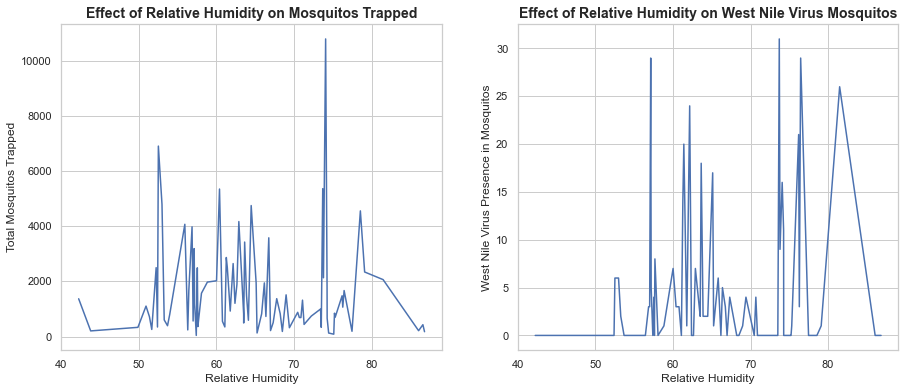

In [202]:
# Plot the effect of relative humidity on mosquitos
title_list = ['Effect of Relative Humidity on Mosquitos Trapped', 
              'Effect of Relative Humidity on West Nile Virus Mosquitos']
subplot_line(relative_humidity, title_list, 'Relative Humidity')

### Night Time

Mosquitos are active at night. We will add in a new feature night time. Night time is calculated based on 24 hours minus the difference between for sunrise and sunset hours ([source](https://www.terminix.com/mosquitoes/facts/when-are-mosquitoes-active/))

In [203]:
# Function to covert time to float
def conv_hour(time):
    # Extract the last two digits (as minutes)
    time = time / 100
    minutes = (time % 1) * 100

    # Convert minute to decimal representation
    conv_min = minutes / 60
    
    # Extract the first two digits (as hours)
    hour = round(time - conv_min, 0)

    # Return time in float
    return hour + conv_min

In [204]:
df_merged['SunsetHour'] = df_merged['Sunset'].apply(lambda x: conv_hour(x))
df_merged['SunriseHour'] = df_merged['Sunrise'].apply(lambda x: conv_hour(x))

df_merged['NightTime'] = 24 - (df_merged['SunsetHour'] - df_merged['SunriseHour'])
df_merged.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CsBR,CsNA,CsRA,CsTS,CsFG,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1,0,0,0,0,0,57.398449,19.283333,4.35,9.066667
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,1,0,0,0,0,0,57.398449,19.283333,4.35,9.066667


In [205]:
# Subset night time data
night_time = df_merged[['NightTime', 'TotMosquitos', 'WnvPresent']].groupby('NightTime').sum()

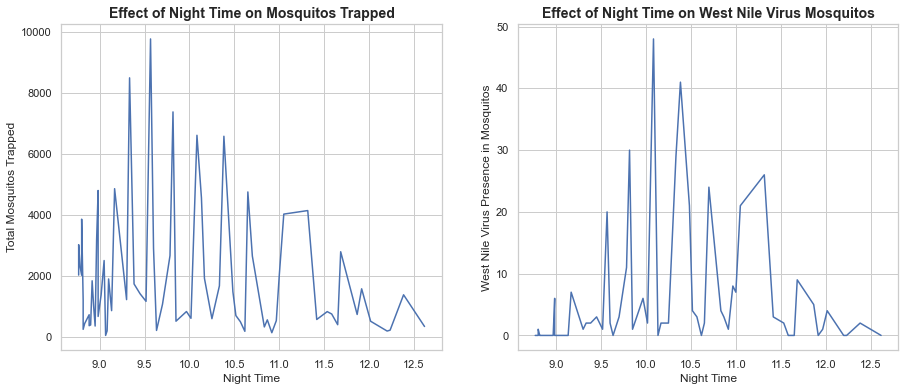

In [206]:
# Plot the effect of night time on mosquitos
title_list = ['Effect of Night Time on Mosquitos Trapped', 'Effect of Night Time on West Nile Virus Mosquitos']
subplot_line(night_time, title_list, 'Night Time')

### Day Time

Day time is also another factor that influence the breed of the mosquito ([*source*](https://parasitesandvectors.biomedcentral.com/track/pdf/10.1186/1756-3305-6-129.pdf)). We will add in a new feature day time. Day time is calculated based the difference between for sunrise and sunset hours


In [207]:
df_merged['DayTime'] = df_merged['SunsetHour'] - df_merged['SunriseHour']
df_merged.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CsNA,CsRA,CsTS,CsFG,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333


In [208]:
# Subset day time data
day_time = df_merged[['DayTime', 'TotMosquitos', 'WnvPresent']].groupby('DayTime').sum()

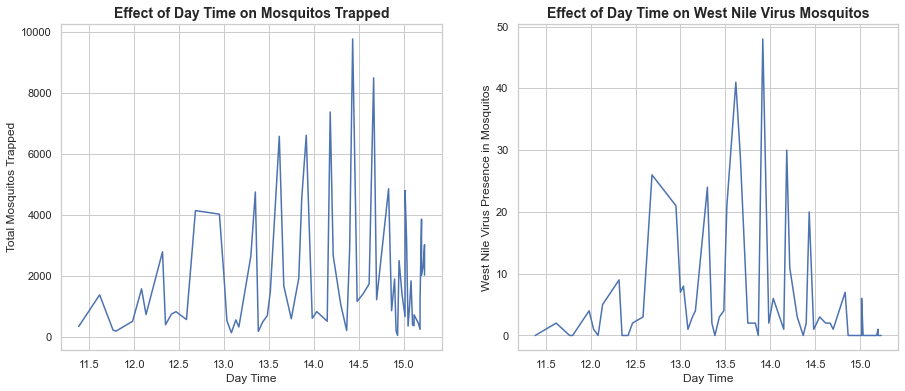

In [209]:
# Plot the effect of day time on mosquitos
title_list = ['Effect of Day Time on Mosquitos Trapped', 'Effect of Day Time on West Nile Virus Mosquitos']
subplot_line(day_time, title_list, 'Day Time')

### Temperature Difference

In [210]:
df_merged['Tdiff'] = df_merged['Tmax'] - df_merged['Tmin']
df_merged.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CsRA,CsTS,CsFG,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime,Tdiff
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28


In [211]:
# Subset temperature difference data
temp_diff = df_merged[['Tdiff', 'TotMosquitos', 'WnvPresent']].groupby('Tdiff').sum()

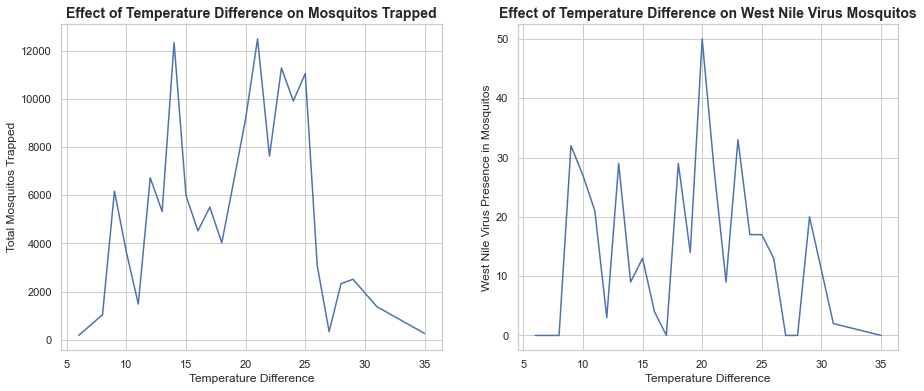

In [212]:
# Plot the effect of temperature difference on mosquitos
title_list = ['Effect of Temperature Difference on Mosquitos Trapped', 
              'Effect of Temperature Difference on West Nile Virus Mosquitos']
subplot_line(temp_diff, title_list, 'Temperature Difference')

### West Nile Virus Risk

Based on EDA analysis, location seems to be a good predictor for detecting West Nile Virus. We will create a WNV risk feature: 
- **Low**: Between 0 and 2 cases
- **Medium**: Between 2 and 6 cases
- **High**: More than 6 cases

In [213]:
# Create a pivot table to sum the number of WNV cases detected at each location using the address
wnv_risk = df_train.pivot_table(values = ['WnvPresent'], index = 'AddressNumberAndStreet', aggfunc = 'sum')
wnv_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
WnvPresent,138.0,2.681159,2.874467,0.0,0.0,2.0,4.0,13.0


Text(0, 0.5, 'Frequency')

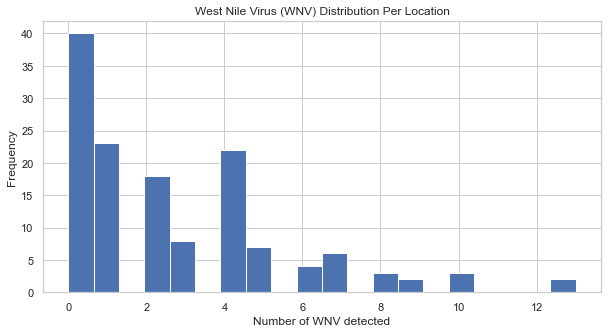

In [214]:
# Plot histogram to show the spread in number of WNV cases detected
plt.figure(figsize = (10,5))
plt.hist(wnv_risk, bins = 20)
plt.title('West Nile Virus (WNV) Distribution Per Location')
plt.xlabel('Number of WNV detected')
plt.ylabel('Frequency')

In [215]:
# Create feature to assign risk of WNV for the locations
wnv_risk['WnvRisk'] = pd.cut(wnv_risk["WnvPresent"], bins = [0, 2, 5, 20], right = False, 
                             labels = ['low', 'medium', 'high'], ordered = True)
wnv_risk.head()

,WnvPresent,WnvRisk
AddressNumberAndStreet,,
"1000 E 67TH ST, Chicago, IL",4,medium
"1000 N CENTRAL PARK DR, Chicago, IL",6,high
"1000 S CALIFORNIA AVE, Chicago, IL",0,low
"1000 S COTTAGE GROVE, Chicago, IL",2,medium
"1000 S STONY ISLAND AVE, Chicago, IL",2,medium


In [216]:
# Merge risk data with train data
df_merged = df_merged.merge(wnv_risk[["WnvRisk"]], how = "left", on = "AddressNumberAndStreet")
df_merged.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CsTS,CsFG,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime,Tdiff,WnvRisk
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28,high
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28,high
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28,low
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28,medium
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0,0,0,57.398449,19.283333,4.35,9.066667,14.933333,28,medium


### Time Lag

In [217]:
df_merged['Tavg_7daysbf'] = df_merged['Tavg'].shift(periods = 7, fill_value = 0)
df_merged['DewPoint_7daysbf'] = df_merged['DewPoint'].shift(periods = 7, fill_value = 0)
df_merged['PrecipTotal_7daysbf'] = df_merged['PrecipTotal'].shift(periods = 7, fill_value = 0)

In [218]:
df_merged.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime,Tdiff,WnvRisk,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,57.398449,19.283333,4.35,9.066667,14.933333,28,high,0.0,0,0.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,57.398449,19.283333,4.35,9.066667,14.933333,28,high,0.0,0,0.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,57.398449,19.283333,4.35,9.066667,14.933333,28,low,0.0,0,0.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,57.398449,19.283333,4.35,9.066667,14.933333,28,medium,0.0,0,0.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,57.398449,19.283333,4.35,9.066667,14.933333,28,medium,0.0,0,0.0


## Preprocessing datasets for modeling

We will perform preprocessing of the train and test datasets for the modeling.

###  Train Dataset

In [219]:
# Create a new dataframe for train dataset for modeling
df_train_model = df_merged.copy()
df_train_model.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime,Tdiff,WnvRisk,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,57.398449,19.283333,4.35,9.066667,14.933333,28,high,0.0,0,0.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,57.398449,19.283333,4.35,9.066667,14.933333,28,high,0.0,0,0.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,57.398449,19.283333,4.35,9.066667,14.933333,28,low,0.0,0,0.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,57.398449,19.283333,4.35,9.066667,14.933333,28,medium,0.0,0,0.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,57.398449,19.283333,4.35,9.066667,14.933333,28,medium,0.0,0,0.0


In [220]:
df_train_model.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'TotMosquitos', 'Year', 'Month', 'Week',
       'Year Month', 'Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'CsHZ', 'CsTSRA',
       'CsDZ', 'CsBR', 'CsNA', 'CsRA', 'CsTS', 'CsFG', 'CsVCTS',
       'RelativeHumidity', 'SunsetHour', 'SunriseHour', 'NightTime', 'DayTime',
       'Tdiff', 'WnvRisk', 'Tavg_7daysbf', 'DewPoint_7daysbf',
       'PrecipTotal_7daysbf'],
      dtype='object')

In [221]:
# List the columns to drop
columns_to_drop = ['Date', 'Address', 'Street', 'Trap', 'AddressNumberAndStreet', 'Block', 
                   'AddressAccuracy', 'NumMosquitos', 'TotMosquitos', 'Year', 'Month', 'Year Month', 'Station', 
                   'Tmax', 'Tmin', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SunsetHour', 'SunriseHour', 'Tdiff',
                   'CsHZ', 'CsVCTS', 'CsNA', 'CsDZ', 'CsFG']
drop_columns(df_train_model, columns_to_drop)
df_train_model.head(2)

,Species,Latitude,Longitude,WnvPresent,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,...,CsBR,CsRA,CsTS,RelativeHumidity,NightTime,DayTime,WnvRisk,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf
0,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,0,22,74.0,58,65.0,0.0,29.39,...,1,0,0,57.398449,9.066667,14.933333,high,0.0,0,0.0
1,CULEX RESTUANS,41.95469,-87.800991,0,22,74.0,58,65.0,0.0,29.39,...,1,0,0,57.398449,9.066667,14.933333,high,0.0,0,0.0


In [222]:
df_train_model.shape

(8475, 25)

In [223]:
# Dummify the categorical feature Species
df_train_model = pd.get_dummies(df_train_model, columns = ['Species', 'WnvRisk'])
df_train_model.shape

(8475, 33)

In [224]:
# List the columns to drop
columns_to_drop = ['Species_CULEX ERRATICUS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 
                   'Species_CULEX TERRITANS']
drop_columns(df_train_model, columns_to_drop)
df_train_model.head(2)

,Latitude,Longitude,WnvPresent,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,...,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
0,41.95469,-87.800991,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,1,0,0,0,1
1,41.95469,-87.800991,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,0,1,0,0,1


In [225]:
df_train_model.shape

(8475, 29)

In [226]:
df_train_model.head()

,Latitude,Longitude,WnvPresent,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,...,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
0,41.954690,-87.800991,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,1,0,0,0,1
1,41.954690,-87.800991,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,0,1,0,0,1
2,41.994991,-87.769279,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,0,1,1,0,0
3,41.974089,-87.824812,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,1,0,0,1,0
4,41.974089,-87.824812,0,22,74.0,58,65.0,0.0,29.39,30.11,...,14.933333,0.0,0,0.0,0,0,1,0,1,0


### Test Dataset

In [227]:
df_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [228]:
# Create year, month, week and year month for test dataset
date_creation(df_test, 'Date')
df_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Year,Month,Week,Year Month
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2008 06
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2008 06
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2008 06
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2008 06
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2008 06


In [229]:
# Merge df_test and df_weather_stn1
df_test_model = pd.merge(df_test, df_weather_stn1, on = ['Date'])
df_test_model.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,CsNA,CsRA,CsBCFG,CsTS,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1,0,0,0,0,0,0,0,0,0
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1,0,0,0,0,0,0,0,0,0


In [230]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
 11  Year                    116293 non-null  int64         
 12  Month                   116293

In [231]:
# Create a column for relative humidity
df_test_model['RelativeHumidity'] = 100 * (np.exp((17.625 * ((df_test_model['DewPoint'] - 32) / 1.8)) / 
                                                  (243.04 + ((df_test_model['DewPoint'] - 32) / 1.8))) / 
                                           np.exp((17.625 * ((df_test_model['Tavg'] - 32) / 1.8)) / 
                                                  (243.04 + ((df_test_model['Tavg'] - 32) / 1.8))))
df_test_model.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,CsRA,CsBCFG,CsTS,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS,RelativeHumidity
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,0,0,0,0,0,0,0,0,0,53.405643
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,0,0,0,0,0,0,0,0,0,53.405643


In [232]:
# Create column for NightTime
df_test_model['SunsetHour'] = df_test_model['Sunset'].apply(lambda x: conv_hour(x))
df_test_model['SunriseHour'] = df_test_model['Sunrise'].apply(lambda x: conv_hour(x))

df_test_model['NightTime'] = 24 - (df_test_model['SunsetHour'] - df_test_model['SunriseHour'])
df_test_model.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,CsFG,CsFG+,CsSQ,CsFU,CsSN,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,0,0,0,0,0,0,53.405643,19.433333,4.266667,8.833333
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,0,0,0,0,0,0,53.405643,19.433333,4.266667,8.833333


In [233]:
# Create column for DayTime
df_test_model['DayTime'] = df_test_model['SunsetHour'] - df_test_model['SunriseHour']
df_test_model.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,CsFG+,CsSQ,CsFU,CsSN,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,0,0,0,0,0,53.405643,19.433333,4.266667,8.833333,15.166667
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,0,0,0,0,0,53.405643,19.433333,4.266667,8.833333,15.166667


In [234]:
# Create column for 7 days timelag
df_test_model['Tavg_7daysbf'] = df_test_model['Tavg'].shift(periods = 7, fill_value = 0)
df_test_model['DewPoint_7daysbf'] = df_test_model['DewPoint'].shift(periods = 7, fill_value = 0)
df_test_model['PrecipTotal_7daysbf'] = df_test_model['PrecipTotal'].shift(periods = 7, fill_value = 0)

In [235]:
df_test_model.shape

(116293, 56)

In [236]:
# Add WNV risk feature to test dataset
df_test_model = df_test_model.merge(wnv_risk[["WnvRisk"]], how = 'left', on = 'AddressNumberAndStreet')
df_test_model.head(10)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,CsVCTS,RelativeHumidity,SunsetHour,SunriseHour,NightTime,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,WnvRisk
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
5,6,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TARSALIS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
6,7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",UNSPECIFIED CULEX,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,0.0,0,0.0,high
7,8,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX ERRATICUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,74.0,56,0.0,high
8,9,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,74.0,56,0.0,low
9,10,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,...,0,53.405643,19.433333,4.266667,8.833333,15.166667,74.0,56,0.0,low


In [237]:
# Dummify the categorical feature Species
df_test_model = pd.get_dummies(df_test_model, columns = ['Species', 'WnvRisk'])
df_test_model.shape

(116293, 66)

In [238]:
df_test_model.columns

Index(['Id', 'Date', 'Address', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Year', 'Month', 'Week', 'Year Month', 'Station', 'Tmax', 'Tmin',
       'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'CsGR', 'CsHZ', 'CsVCFG', 'CsTSRA', 'CsDZ', 'CsBR',
       'CsMIFG', 'CsNA', 'CsRA', 'CsBCFG', 'CsTS', 'CsFG', 'CsFG+', 'CsSQ',
       'CsFU', 'CsSN', 'CsVCTS', 'RelativeHumidity', 'SunsetHour',
       'SunriseHour', 'NightTime', 'DayTime', 'Tavg_7daysbf',
       'DewPoint_7daysbf', 'PrecipTotal_7daysbf', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX', 'WnvRisk_low', 'WnvRisk_medium',
       'WnvRisk_high'],
      

In [239]:
# List the columns to drop
columns_to_drop = ['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Year', 'Month', 
                   'Year Month', 'AddressAccuracy', 'Station', 'Tmax', 'Tmin', 'Heat', 'Cool', 'Sunrise', 'Sunset', 
                   'SunsetHour', 'SunriseHour', 'Species_CULEX ERRATICUS', 'Species_CULEX SALINARIUS', 
                   'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Species_UNSPECIFIED CULEX', 
                   'CsHZ', 'CsVCTS', 'CsNA', 'CsDZ', 'CsFG', 'CsVCFG', 'CsSN', 'CsFG+', 'CsBCFG', 'CsMIFG', 'CsGR', 
                   'CsSQ', 'CsFU']
drop_columns(df_test_model, columns_to_drop)
df_test_model.head(2)

,Id,Latitude,Longitude,Week,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,...,DayTime,Tavg_7daysbf,DewPoint_7daysbf,PrecipTotal_7daysbf,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,WnvRisk_low,WnvRisk_medium,WnvRisk_high
0,1,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,...,15.166667,0.0,0,0.0,0,1,0,0,0,1
1,2,41.95469,-87.800991,24,74.0,56,64.0,0.0,29.28,29.99,...,15.166667,0.0,0,0.0,0,0,1,0,0,1


In [240]:
df_test_model.shape

(116293, 29)

In [241]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   Week                            116293 non-null  UInt32 
 4   Tavg                            116293 non-null  float64
 5   DewPoint                        116293 non-null  int64  
 6   WetBulb                         116293 non-null  float64
 7   PrecipTotal                     116293 non-null  float64
 8   StnPressure                     116293 non-null  float64
 9   SeaLevel                        116293 non-null  float64
 10  ResultSpeed                     116293 non-null  float64
 11  ResultDir                       116293 non-null  int64  
 12  AvgSpeed        

In [242]:
# Check which columns are different for train and test datasets
print(df_train_model.columns.difference(df_test_model.columns))

Index(['WnvPresent'], dtype='object')


In [244]:
# Export datasets
df_train_model.to_csv('./data/df_train_model.csv', index = False)
df_test_model.to_csv('./data/df_test_model.csv', index = False)

**Continued in Notebook 2**